## import all essential libraries

In [42]:
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix 
from scipy.stats.mstats import winsorize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
import json


## load data

In [43]:
df = pd.read_csv('movie_dataset.csv')
df.head(2)

index     budget                                    genres  \
0      0  237000000  Action Adventure Fantasy Science Fiction   
1      1  300000000                  Adventure Fantasy Action   

                                       homepage     id  \
0                   http://www.avatarmovie.com/  19995   
1  http://disney.go.com/disneypictures/pirates/    285   

                                            keywords original_language  \
0  culture clash future space war space colony so...                en   
1  ocean drug abuse exotic island east india trad...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  ... runtime  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577  ...   162.0   
1  Captain Barbossa, long believed to be dead, ha...  139.082615  ...   169.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   

                                      title vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   

                                                cast  \
0  Sam Worthington Zoe Saldana Sigourney Weaver S...   
1  Johnny Depp Orlando Bloom Keira Knightley Stel...   

                                                crew        director  
0  [{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...   James Cameron  
1  [{'name': 'Dariusz Wolski', 'gender': 2, 'depa...  Gore Verbinski  

[2 rows x 24 columns]

## data summery

In [44]:
print(df.columns)
print('****************************************')
print(df.shape)
print('****************************************')
print(df.info())

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')
****************************************
(4803, 24)
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_la

In [45]:
df.describe()

index        budget             id   popularity       revenue  \
count  4803.000000  4.803000e+03    4803.000000  4803.000000  4.803000e+03   
mean   2401.000000  2.904504e+07   57165.484281    21.492301  8.226064e+07   
std    1386.651002  4.072239e+07   88694.614033    31.816650  1.628571e+08   
min       0.000000  0.000000e+00       5.000000     0.000000  0.000000e+00   
25%    1200.500000  7.900000e+05    9014.500000     4.668070  0.000000e+00   
50%    2401.000000  1.500000e+07   14629.000000    12.921594  1.917000e+07   
75%    3601.500000  4.000000e+07   58610.500000    28.313505  9.291719e+07   
max    4802.000000  3.800000e+08  459488.000000   875.581305  2.787965e+09   

           runtime  vote_average    vote_count  
count  4801.000000   4803.000000   4803.000000  
mean    106.875859      6.092172    690.217989  
std      22.611935      1.194612   1234.585891  
min       0.000000      0.000000      0.000000  
25%      94.000000      5.600000     54.000000  
50%     103.000000      6.200000    235.000000  
75%     118.000000      6.800000    737.000000  
max     338.000000     10.000000  13752.000000

In [46]:
df.describe(include='object')

genres                           homepage          keywords  \
count    4775                               1712              4391   
unique   1168                               1691              4219   
top     Drama  http://www.missionimpossible.com/  independent film   
freq      370                                  4                55   

       original_language   original_title  \
count               4803             4803   
unique                37             4801   
top                   en  Out of the Blue   
freq                4505                2   

                                                 overview  \
count                                                4800   
unique                                               4800   
top     In the 22nd century, a paraplegic Marine is di...   
freq                                                    1   

       production_companies  \
count                  4803   
unique                 3697   
top                      []   
freq                    351   

                                     production_countries release_date  \
count                                                4803         4802   
unique                                                469         3280   
top     [{"iso_3166_1": "US", "name": "United States o...   2006-01-01   
freq                                                 2977           10   

                                spoken_languages    status  \
count                                       4803      4803   
unique                                       544         3   
top     [{"iso_639_1": "en", "name": "English"}]  Released   
freq                                        3171      4795   

                       tagline     title  \
count                     3959      4803   
unique                    3944      4800   
top     Based on a true story.  The Host   
freq                         3         2   

                                                     cast  crew  \
count                                                4760  4803   
unique                                               4741  4776   
top     William Shatner Leonard Nimoy DeForest Kelley ...    []   
freq                                                    6    28   

                director  
count               4773  
unique              2349  
top     Steven Spielberg  
freq                  27

## changed types of some coulumns

In [47]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 4803 non-null   int64         
 1   budget                4803 non-null   int64         
 2   genres                4775 non-null   object        
 3   homepage              1712 non-null   object        
 4   id                    4803 non-null   int64         
 5   keywords              4391 non-null   object        
 6   original_language     4803 non-null   object        
 7   original_title        4803 non-null   object        
 8   overview              4800 non-null   object        
 9   popularity            4803 non-null   float64       
 10  production_companies  4803 non-null   object        
 11  production_countries  4803 non-null   object        
 12  release_date          4802 non-null   datetime64[ns]
 13  revenue           

# Deal with Null value  and duplicate


In [48]:
df.duplicated().sum()

0

مجموعا در کل دیتا چند درصد مقادیر گم  شده وجود دارد

In [49]:
null_count= df.isna().sum()
total_cell = np.product(df.shape)
print(df.shape, total_cell, null_count.sum() )
print((null_count.sum()/total_cell)*100)

(4803, 24) 115272 4454
3.863904504129364


هر ویژگی از دیتا ست شامل چند مقدار گم شده است

In [50]:
df.isna().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

سطری که همه مقادیرش نال باشد نداشتیم 


In [51]:
df = df.dropna(axis=0, how='all')
df.isna().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

  حذف سطرهایی که این ستونهاشون دارای مقادیر گم شده هستن
  
  به علت کم بودن تعداد مقادیر گم شده این دو ستون، سطرهای مربوط به آنها را حذف کردم

In [52]:
df = df.dropna(axis=0, subset =['overview', 'release_date'])
df.isna().sum()

index                      0
budget                     0
genres                    27
homepage                3087
id                         0
keywords                 410
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  840
title                      0
vote_average               0
vote_count                 0
cast                      41
crew                       0
director                  29
dtype: int64

###  حذف homepage

In [53]:
df.drop(df.columns[ df.isna().sum()/len(df) >= 0.6] ,axis = 1, inplace=True)
df.isna().sum()

index                     0
budget                    0
genres                   27
id                        0
keywords                410
original_language         0
original_title            0
overview                  0
popularity                0
production_companies      0
production_countries      0
release_date              0
revenue                   0
runtime                   0
spoken_languages          0
status                    0
tagline                 840
title                     0
vote_average              0
vote_count                0
cast                     41
crew                      0
director                 29
dtype: int64

## imputation
### Another insight into Null value

In [54]:
df['runtime'].fillna((df['runtime'].mean()), inplace=True)
df['genres'].fillna(df['genres'].mode()[0], inplace=True)
df['director'].fillna(df['director'].mode()[0], inplace=True)
df['cast'].fillna(df['cast'].mode()[0], inplace=True)
df['keywords'].fillna('', inplace=True)
df['tagline'].fillna('', inplace=True)

In [55]:
df.isna().sum()

index                   0
budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
director                0
dtype: int64

# Outliers


براساس تابع زیر،  تعداد داده پرت برای هر ستون را مشخص میکنیم

In [56]:
def find_outlier(df):
      for col in df.columns:
        try:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            outlier = df[col][(df[col].values < Q1-1.5*IQR) | (df[col].values > Q3+1.5*IQR)]
            if len(outlier.values) > 0:
                print(col, len(outlier.values), len(df[col]))
        except:
             print('cant find outlier for ', col)


find_outlier(df)

budget 321 4799
cant find outlier for  genres
id 700 4799
cant find outlier for  keywords
cant find outlier for  original_language
cant find outlier for  original_title
cant find outlier for  overview
popularity 275 4799
cant find outlier for  production_companies
cant find outlier for  production_countries
release_date 308 4799
revenue 471 4799
runtime 181 4799
cant find outlier for  spoken_languages
cant find outlier for  status
cant find outlier for  tagline
cant find outlier for  title
vote_average 154 4799
vote_count 504 4799
cant find outlier for  cast
cant find outlier for  crew
cant find outlier for  director


نمایش داده های پرت با استفاده از باکس پلات

Text(0.5, 1.0, 'Data distribution of budget')

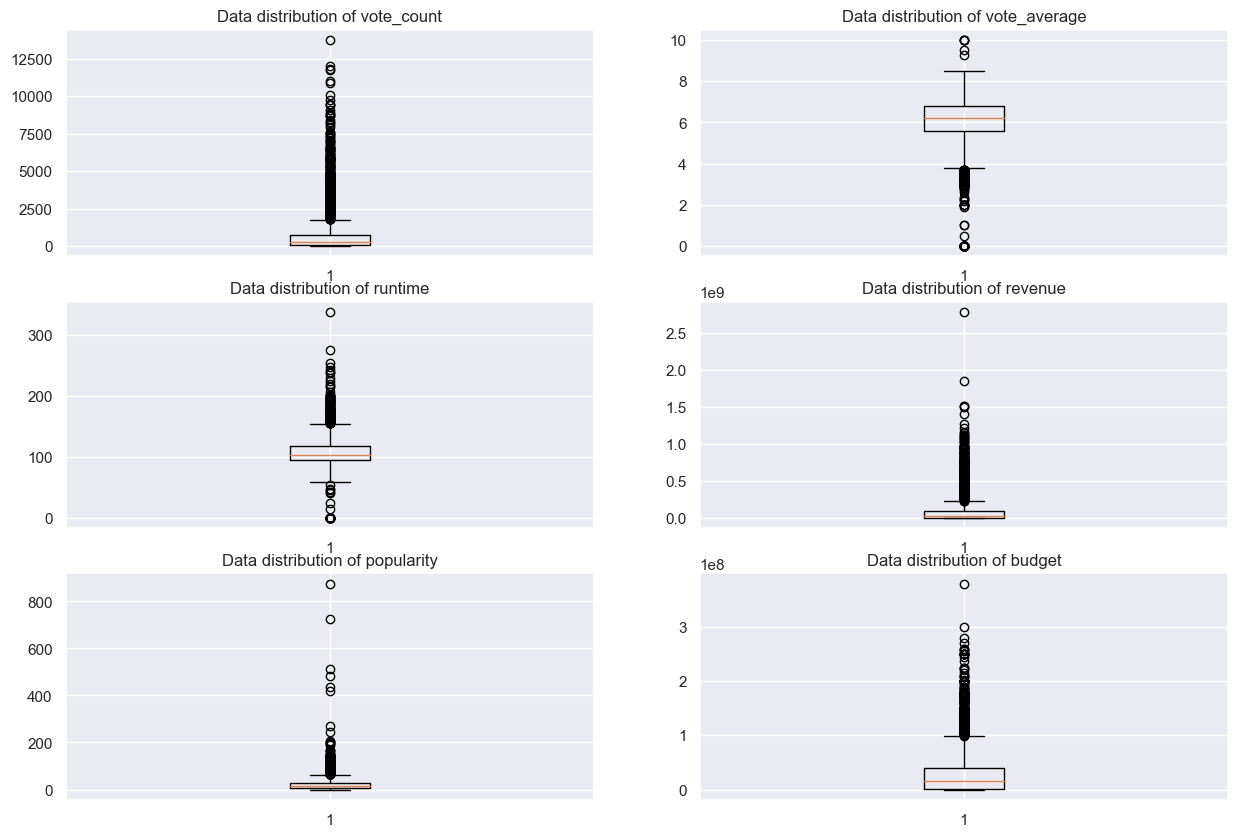

In [57]:
fig , ax = plt.subplots(3, 2 ,figsize=(15,10))
ax[0,0].boxplot(df['vote_count'])
ax[0,0].set_title('Data distribution of vote_count')

ax[0,1].boxplot(df['vote_average'])
ax[0,1].set_title('Data distribution of vote_average')

ax[1,0].boxplot(df['runtime'])
ax[1,0].set_title('Data distribution of runtime')

ax[1,1].boxplot( df['revenue'])
ax[1,1].set_title('Data distribution of revenue')

ax[2,0].boxplot(df['popularity'])
ax[2,0].set_title('Data distribution of popularity')

ax[2,1].boxplot(df['budget'])
ax[2,1].set_title('Data distribution of budget')

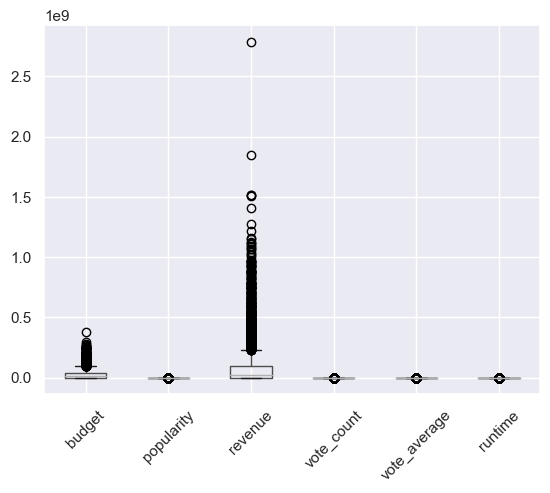

In [58]:
boxplot1 = df.boxplot(column=['budget', 'popularity', 'revenue', 'vote_count' ,'vote_average' , 'runtime'], rot=45)

## using iqr

In [59]:
# Q1 = df['budget'].quantile(0.25)
# Q3 = df['budget'].quantile(0.75)
# IQR = Q3 - Q1
# df.drop(df[(df['budget'] < Q1-1.5*IQR) | (df['budget'] > Q3+1.5*IQR)].index , inplace = True)

## winsorizing

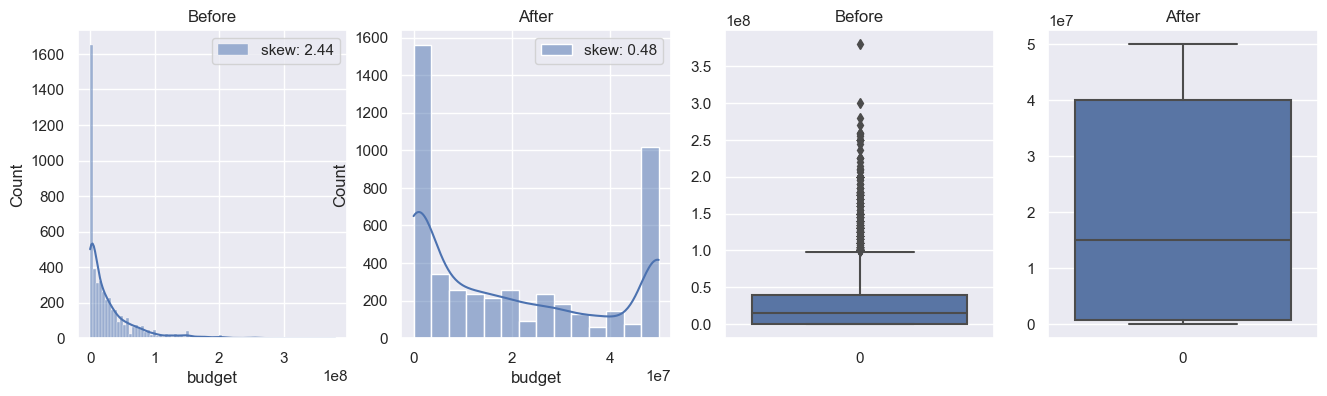

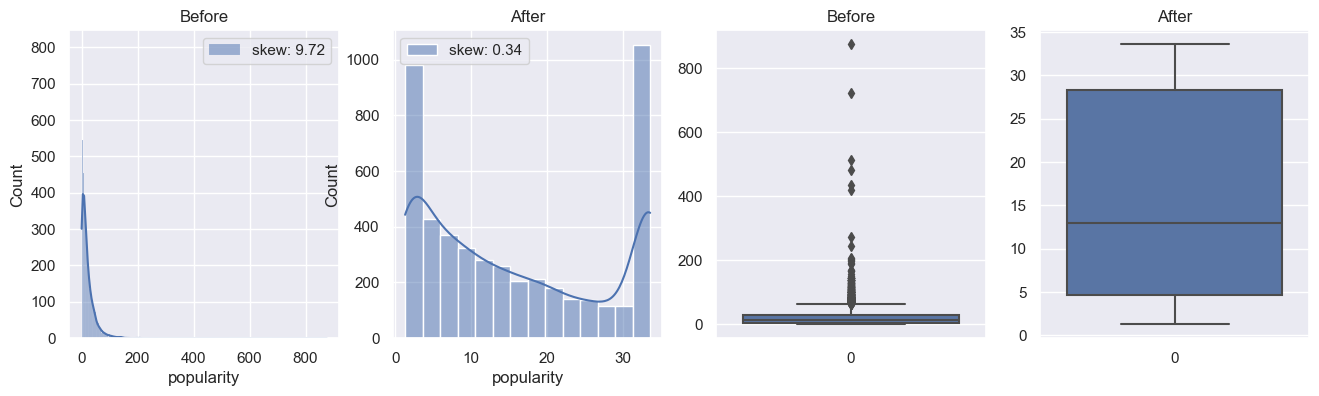

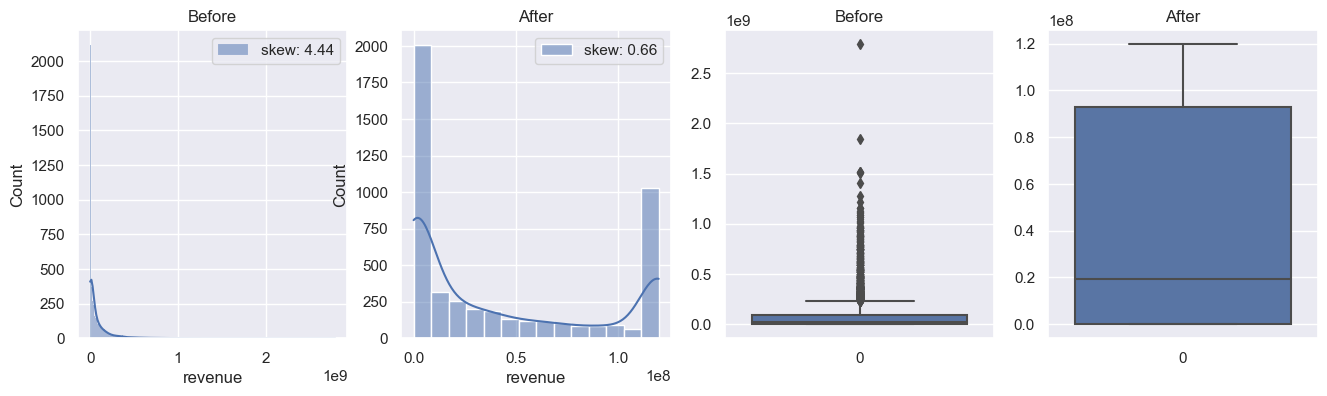

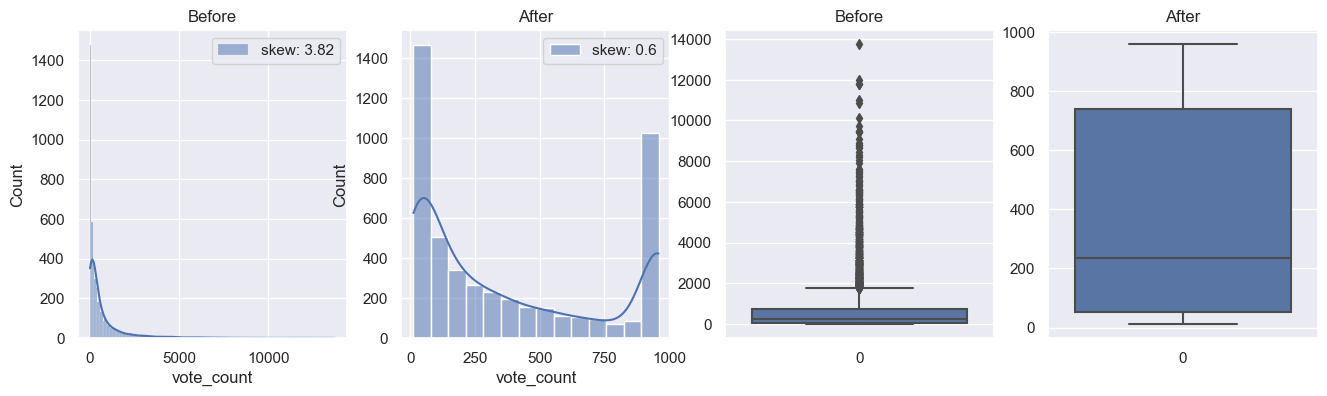

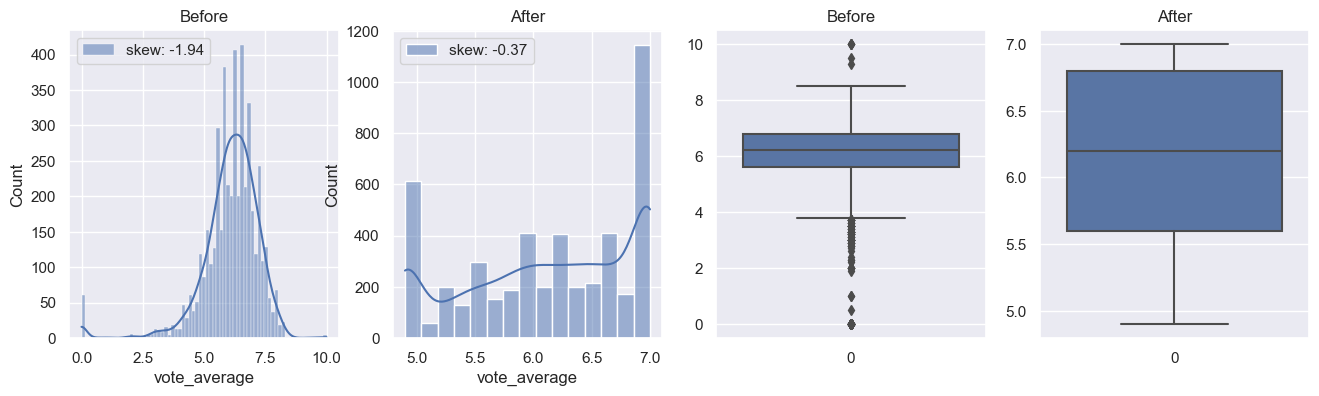

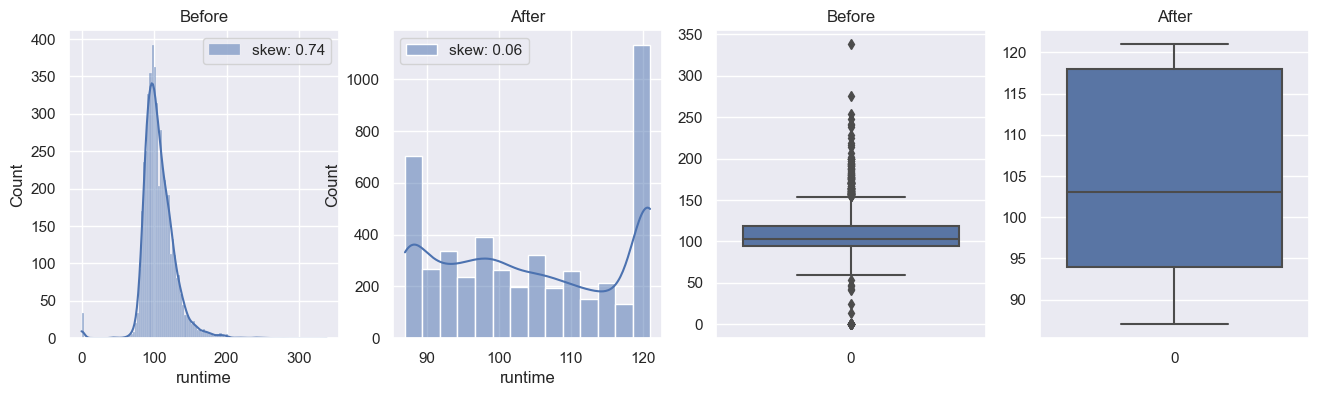

In [60]:
from scipy.stats.mstats import winsorize
df_copy = df.copy()
number_features = ['budget', 'popularity', 'revenue', 'vote_count' ,'vote_average' , 'runtime']

def winsorization(df, cols, low_limit, high_limit):
    for col in cols: 
        winsorize(a=df[col], limits=(low_limit, high_limit), inplace=True)

        
winsorization(df_copy, number_features, 0.1, 0.2)   


for col in number_features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.histplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)), kde=True)
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.histplot(df_copy[col], label="skew: " + str(np.round(df_copy[col].skew(),2)), kde=True)
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_copy[col])
    plt.title('After')
    
    plt.show()

نمایش هیستوگرام ستونهای عددی

C:\Users\hamid\AppData\Local\Temp\ipykernel_9816\3702052128.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax, bins = 20);


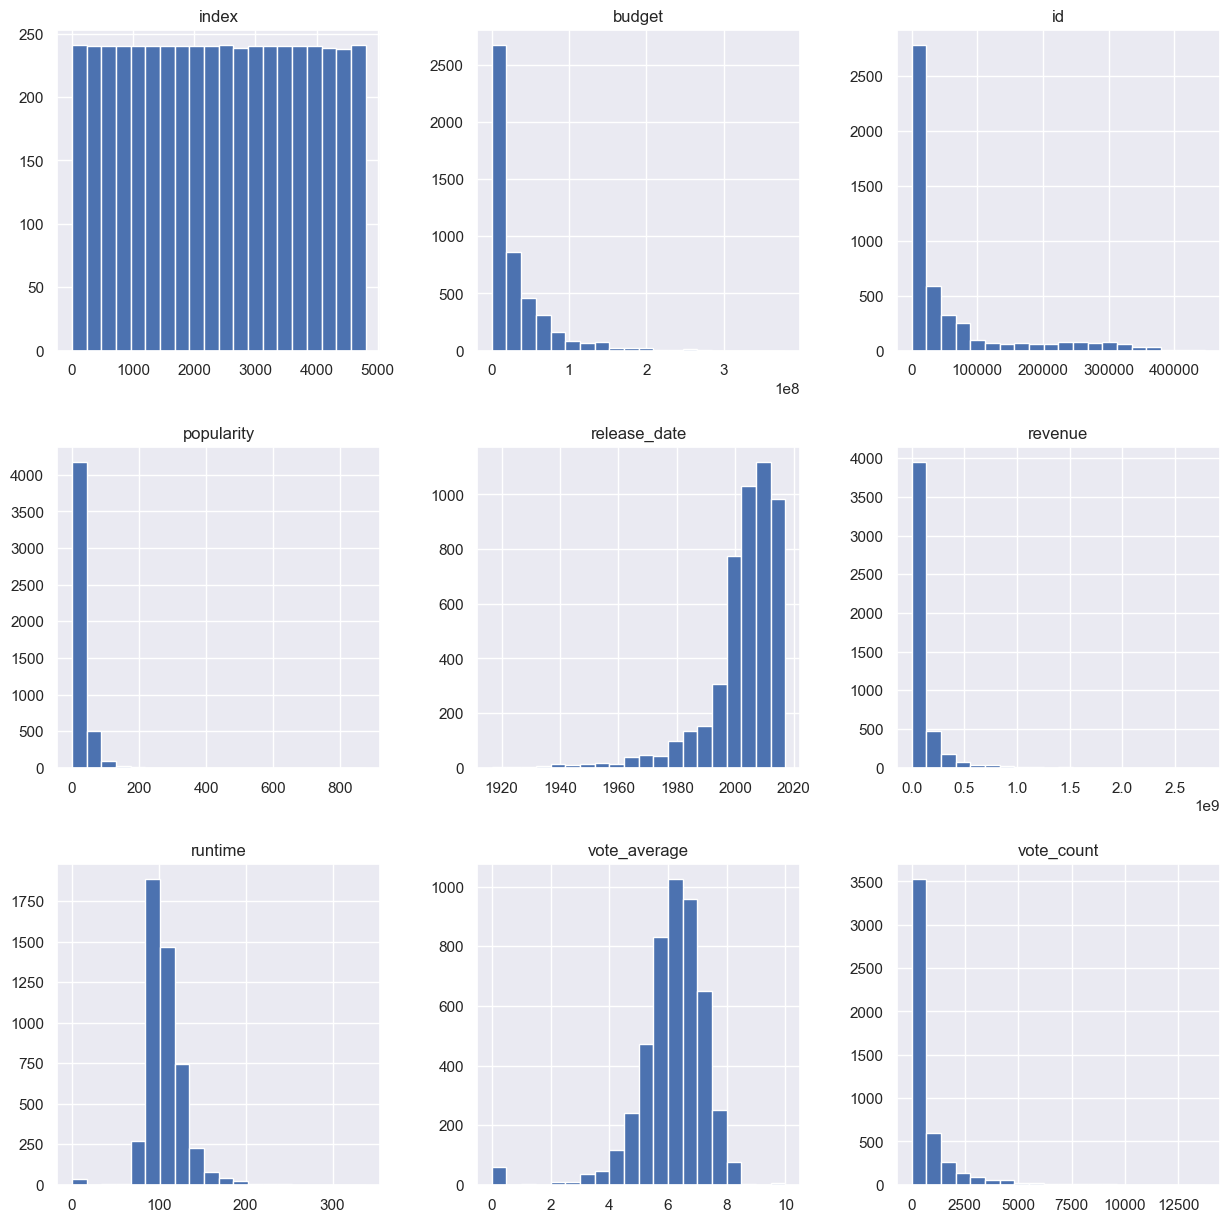

In [61]:
fig , ax = plt.subplots()
fig.set_size_inches(15,15)
df.hist(ax = ax, bins = 20);

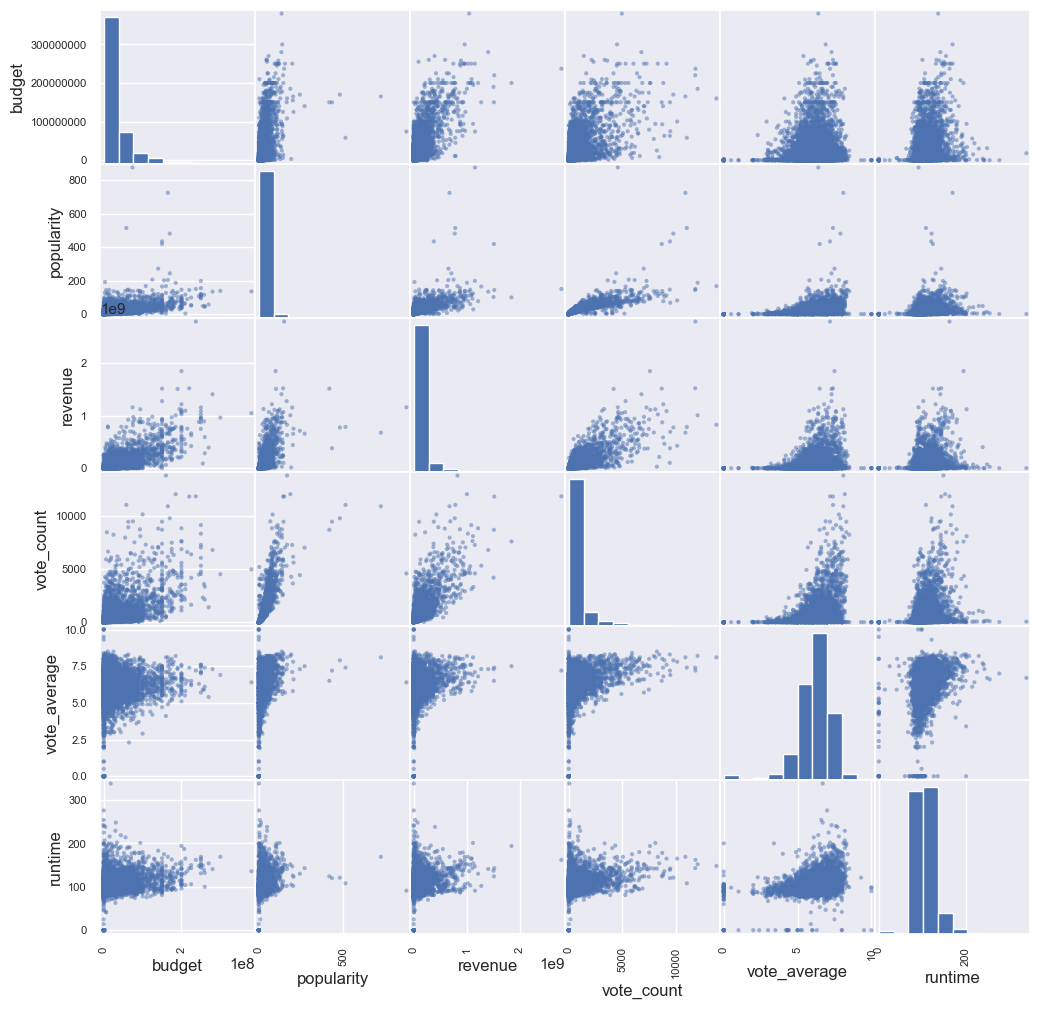

In [62]:
number_features = ['budget', 'popularity', 'revenue', 'vote_count' ,'vote_average' , 'runtime']
matrix = scatter_matrix(df[number_features],figsize=(12,12))

<Axes: xlabel='budget', ylabel='popularity'>

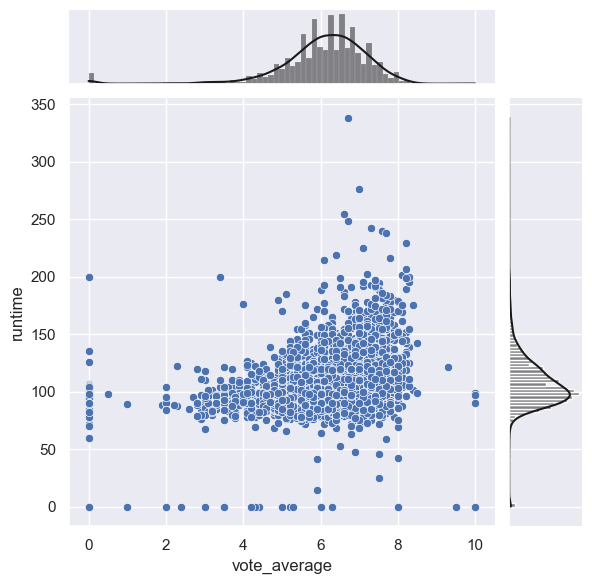

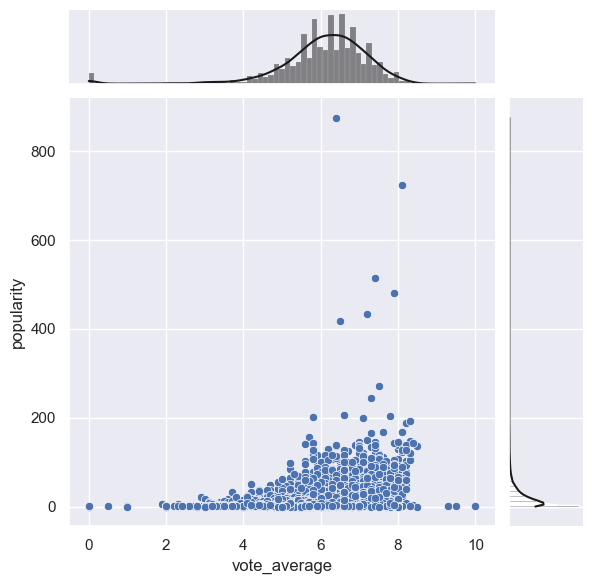

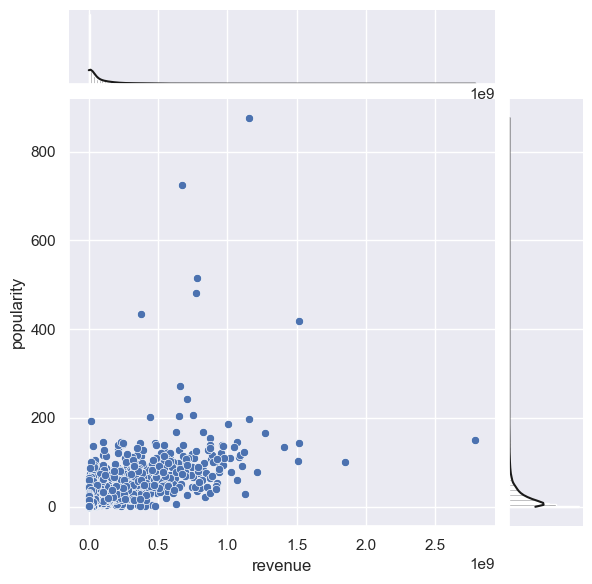

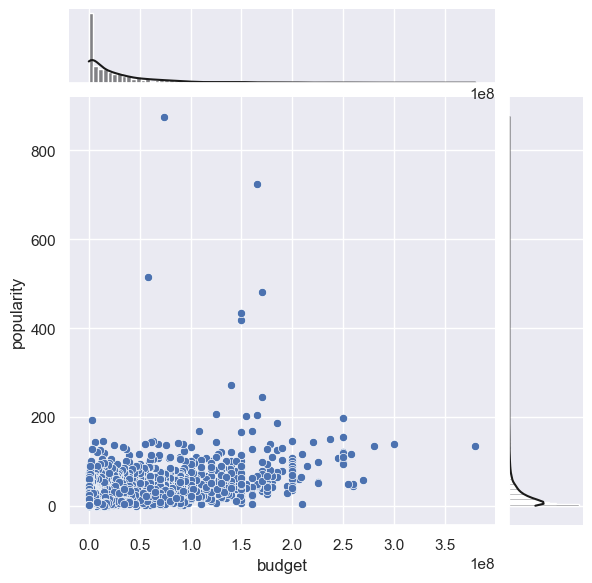

In [63]:
sns.set(style="darkgrid")

g5 = sns.jointplot(x="vote_average", y="runtime", data=df, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color='k')
g5.ax_joint.cla()
sns.scatterplot(data=df, x='vote_average', y='runtime',  sizes=(10, 200),
                ax=g5.ax_joint)


g1 = sns.jointplot(x="vote_average", y="popularity", data=df, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color='k')
g1.ax_joint.cla()
sns.scatterplot(data=df, x='vote_average', y='popularity',  sizes=(10, 200),
                ax=g1.ax_joint)



g2 = sns.jointplot(x="revenue", y="popularity", data=df, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color='k')
g2.ax_joint.cla()
sns.scatterplot(data=df, x='revenue', y='popularity',  sizes=(10, 200),
                ax=g2.ax_joint)



g3 = sns.jointplot(x="budget", y="popularity", data=df, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color='k')
g3.ax_joint.cla()
sns.scatterplot(data=df, x='budget', y='popularity',  sizes=(10, 200),
                ax=g3.ax_joint)

## Feature engineering

extract and create new features 
 &      
transformation(encoding some categorical feature) 

In [64]:
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month
df['profit'] = df['revenue'] - df['budget']
df['success'] = df.apply(lambda row: 1 if ((row["profit"] >= 0) & ((row['vote_average'] > df.loc[:, 'vote_average'].median()) | (row['popularity'] > df.loc[:, 'popularity'].median()))) else 0, axis = 1)
df['budget_qualitative'] = df['budget'].apply(lambda x: "low" if x < 100000000 else "mid" if 100000000 <= x <= 250000000 else "high")

df['country'] = df['production_countries'].apply(lambda x: [item['name'] for item in json.loads(x)])
df['companies'] = df['production_companies'].apply(lambda x: [item['name'] for item in json.loads(x)])
df['spoken_languages2'] = df['spoken_languages'].apply(lambda x: [item['name'] for item in json.loads(x)])

print("rows number  With 0 Values in  Budget :",df[df['budget']==0].shape[0])
print("rows number With 0 Values in  Revenue:",df[df['revenue']==0].shape[0]) 
df['revenue'] = df['revenue'].apply(lambda x: 1000000 if x < 1000000 else x)
df['budget'] = df['budget'].apply(lambda x: 1000000 if x < 1000000 else x)
df['vote_count'] = df['vote_count'].apply(lambda x: 1 if x == 0 else x)


df['director'].apply(lambda x: str(x).encode('unicode-escape').decode('unicode-escape') )
df['original_title'].apply(lambda x: x.encode('unicode-escape').decode('unicode-escape') )
df['title'].apply(lambda x: x.encode('unicode-escape').decode('unicode-escape'))

df_copy = df.copy()


rows number  With 0 Values in  Budget : 1036
rows number With 0 Values in  Revenue: 1423


## log transformation

ندل کردن مقادیر خیلی کم ستون بودجه
 در امد  و value_count. 
چون تعداد صفرهای بودجه زیاد بود از حذف کردن آن خودداری کردم 

C:\Users\hamid\AppData\Local\Temp\ipykernel_9816\4259988534.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax, bins = 20);


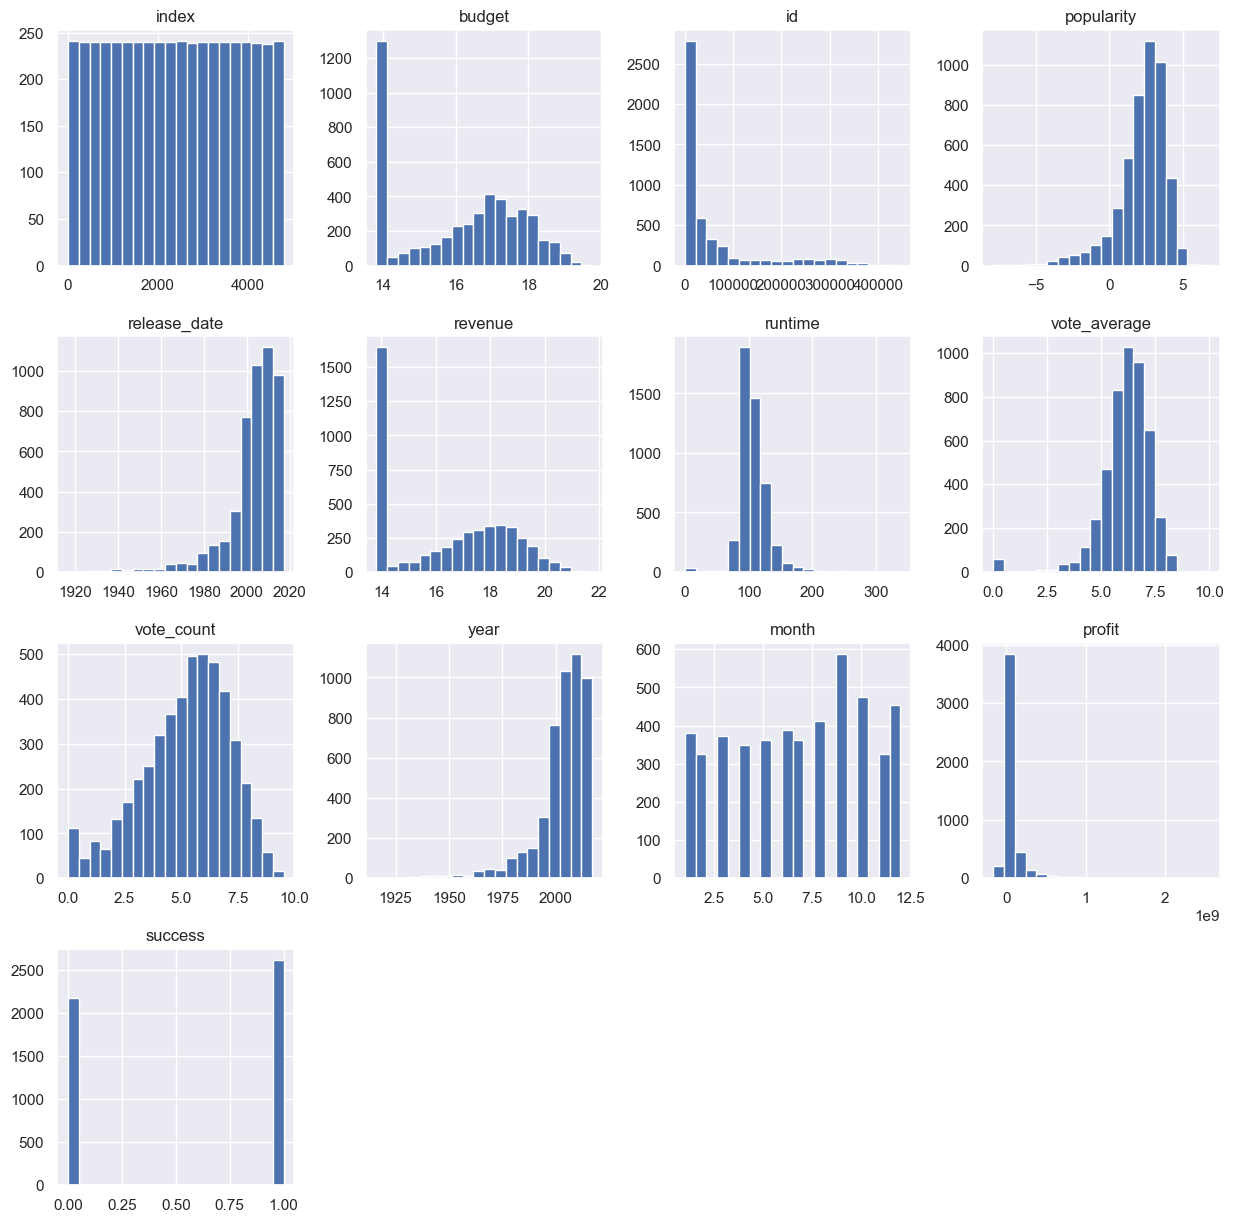

In [65]:
df['budget'] = np.log(df['budget'])
df['revenue'] = np.log(df['revenue'])
df['vote_count'] = np.log((df['vote_count']) )
df['popularity'] = np.log(df['popularity'] )

fig , ax = plt.subplots()
fig.set_size_inches(15,15)
df.hist(ax = ax, bins = 20);

<Axes: xlabel='budget', ylabel='popularity'>

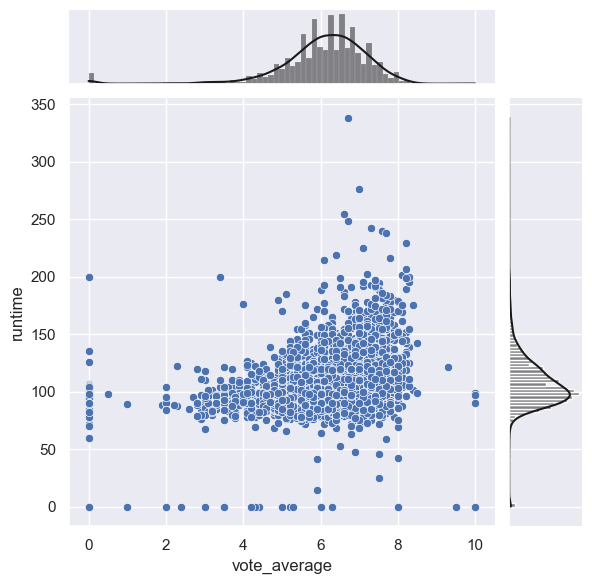

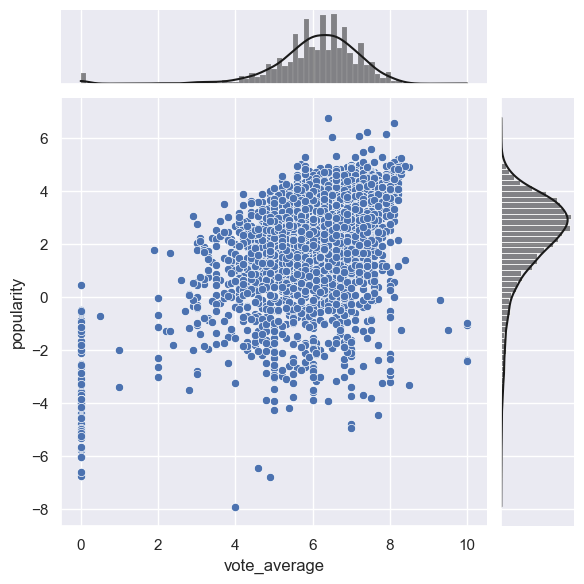

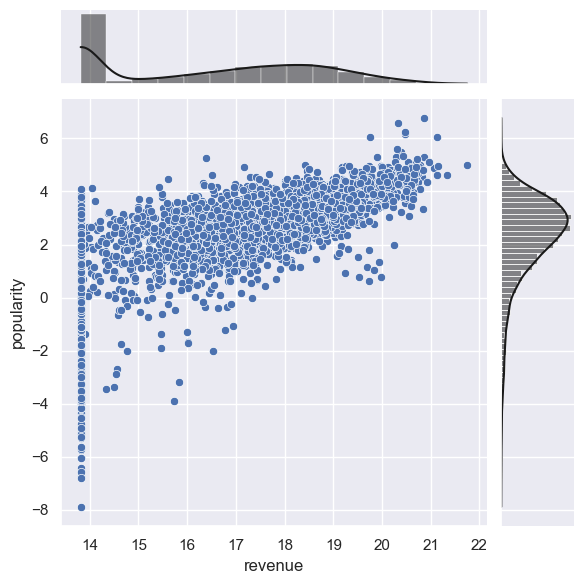

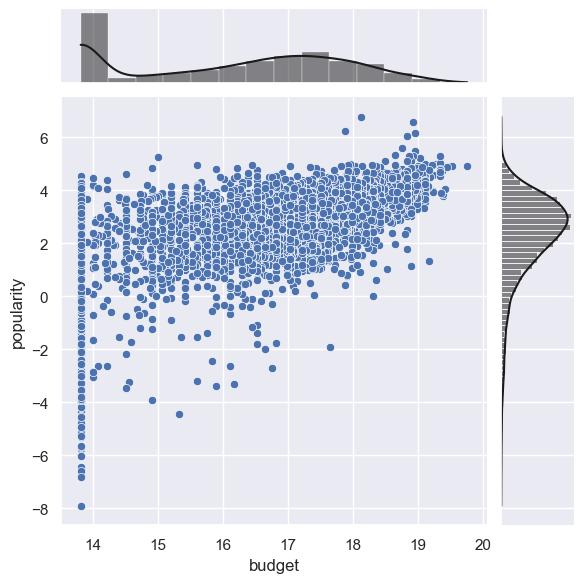

In [66]:
sns.set(style="darkgrid")

g5 = sns.jointplot(x="vote_average", y="runtime", data=df, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color='k')
g5.ax_joint.cla()
sns.scatterplot(data=df, x='vote_average', y='runtime',  sizes=(10, 200),
                ax=g5.ax_joint)


g1 = sns.jointplot(x="vote_average", y="popularity", data=df, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color='k')
g1.ax_joint.cla()
sns.scatterplot(data=df, x='vote_average', y='popularity',  sizes=(10, 200),
                ax=g1.ax_joint)



g2 = sns.jointplot(x="revenue", y="popularity", data=df, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color='k')
g2.ax_joint.cla()
sns.scatterplot(data=df, x='revenue', y='popularity',  sizes=(10, 200),
                ax=g2.ax_joint)



g3 = sns.jointplot(x="budget", y="popularity", data=df, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color='k')
g3.ax_joint.cla()
sns.scatterplot(data=df, x='budget', y='popularity',  sizes=(10, 200),
                ax=g3.ax_joint)

# heat map chart

Text(0.5, 1.0, 'correlation heatmap')

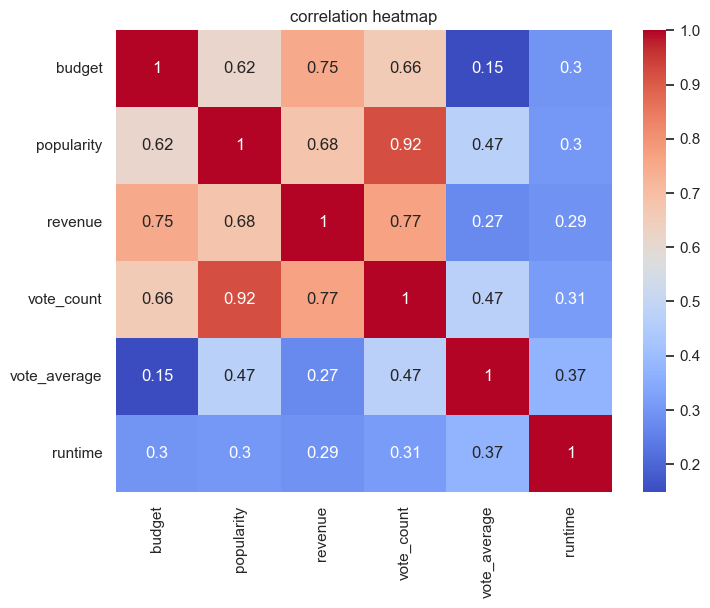

In [67]:
corr_matrix = df[number_features].corr()
fig1, ax1 = plt.subplots(figsize=(8,6))
sns.heatmap(corr_matrix,cmap="coolwarm", annot=True)
ax1.set_title("correlation heatmap")

توضیحات مربوط به هیت مپ بالا:
1) vote_cont     رابطه مستقیم با      popularity
2) vote_count   رابطه مستقیم با  revenue
3) revenue  رابطه مستقیم با  popularity
4) bodget  رابطه مستقیم با  revenue


5) bodget  ربطه مستقیم با  vote_count 

حذف فاصله  میان بعضی ژانرها به منظور ابهام زدایی از نمودار و همینطور ابر کلمات


In [68]:
df.loc[df['genres'] == 'Science Fiction', 'genres'] = 'ScienceFiction'

In [69]:
print(df.shape)
df = df.drop(columns=['index', 'id','spoken_languages', 'original_title','release_date','spoken_languages2', 'production_countries', 'production_companies','crew'])
print(df.shape)

(4799, 31)
(4799, 22)


## scaling number columns (It was not effective)

In [70]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df[['budget', 'popularity', 'revenue',  'vote_average', 'vote_count']] = scaler.fit_transform(df[['budget', 'popularity', 'revenue',  'vote_average', 'vote_count']].to_numpy())
# df.head(2)

# vishualizitioan

0) توزیع بعضی متغیر ها چطور است
1)چطور میتونم تشخیص بدم که ستونهای غیر عددی دارای داده ی پرت هستن یا خیر

2) بهترین فیلم کدام بوده؟ از نظر  رنکینگ
 
3) کارگردان های یک کشور خاص بیشتر چه نوع فیلمهایی را تولید میککند؟

4) 2 تا از بهترین کارگردانهای زانر دارم در امریکا

5) 10  تا از برترین ارگردانهای دنیا عموما چه پیامهایی یا چه شعارهایی در فیلمشان میخان بدن

6) پردرامدترین فیلم

7)به طور میانگین فیلمها چند دقیقه ای هستن؟

8) امریکا بیشتر چه نوع فیلمهایی تولید میکند

9) در کدام ماههای سال بیشترین تعداد فیلمای ریلز شده را داریم

10) فعالترین بازگیر کی بوده ؟

11) محبوبترین فیلم

12) پردرامدترین فیلم در دو سال اخیر کدام بوده ؟

13) کشورهای مختلف بیشتر چه نوع فیلمهایی میسازند

14) محبوبترین فیلم از سال 2010 به بعد

### 0)  بهترین فیلم از نظر رنکینگ

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Me You and Five Bucks'),
  Text(1, 0, 'Stiff Upper Lips'),
  Text(2, 0, 'Dancer, Texas Pop. 81'),
  Text(3, 0, 'Little Big Top'),
  Text(4, 0, 'Sardaarji'),
  Text(5, 0, "One Man's Hero"),
  Text(6, 0, 'The Shawshank Redemption'),
  Text(7, 0, 'There Goes My Baby'),
  Text(8, 0, 'The Godfather'),
  Text(9, 0, 'The Prisoner of Zenda'),
  Text(10, 0, 'Fight Club'),
  Text(11, 0, 'Pulp Fiction'),
  Text(12, 0, 'Spirited Away'),
  Text(13, 0, 'Whiplash'),
  Text(14, 0, 'The Godfather: Part II')])

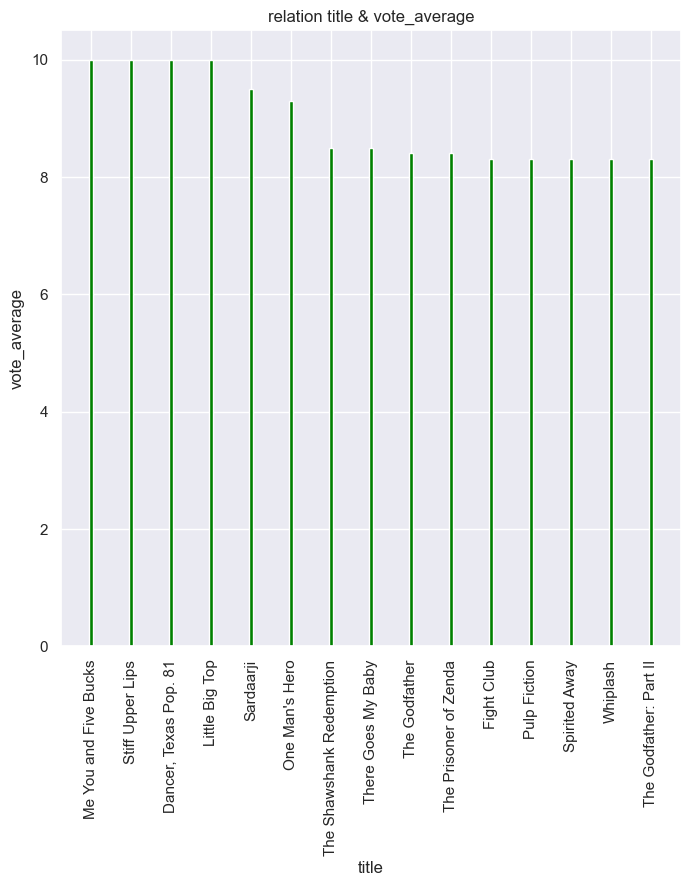

In [104]:
film_high_rank =pd.DataFrame(df.groupby('title')['vote_average'].mean())
film_high_rank.reset_index(inplace=True)
df_mean_duration = film_high_rank.sort_values(by=['vote_average'], ascending=False)

fig2 , ax2 = plt.subplots(figsize=(8,8))
ax2.bar(df_mean_duration[:15]['title'] , df_mean_duration[:15]['vote_average'], color = 'green' , width=0.1)
ax2.set_title('relation title & vote_average')
ax2.set_xlabel('title')
ax2.set_ylabel('vote_average')
plt.xticks(rotation='vertical')

### 1)What does the success of the film mean? Ratings or sales or...?

#### condition1 = df["profit"] >= 0

#### condition2 = (df['vote_average'] > df.loc[:, 'vote_average'].median()) | (df['popularity'] > df.loc[:, 'popularity'].median())

#### main_condition = condition1  &  condition2

### 2)  In which genres are films generally made?

Text(0.5, 1.0, 'In which genres are films generally made?')

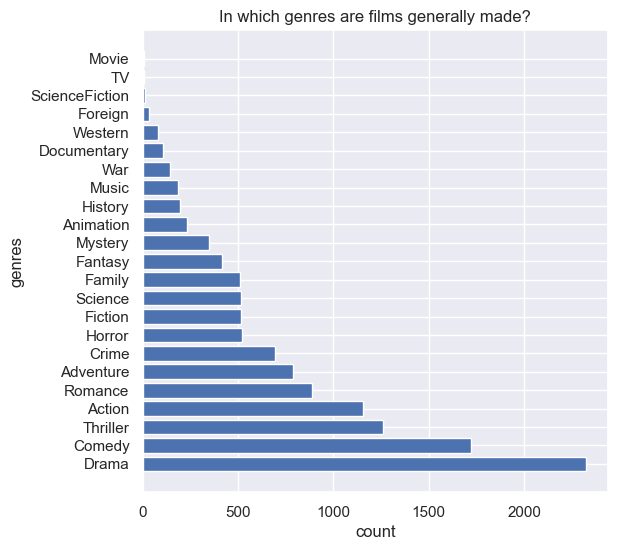

In [71]:
count_dict = {}
def count_genres(junr):
        junrs = junr.split(' ')
        for item in junrs:
            if item in count_dict.keys():
                count_dict[item]=count_dict[item]+1
            else:
                count_dict[item] = 1

df['genres'].apply(count_genres)  

new_dict={'genres':count_dict.keys(), 'cnt':count_dict.values()}
df_cnt = pd.DataFrame(new_dict)
df_cnt.sort_values(by='cnt' , ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(6,6))
ax.barh(df_cnt['genres'], df_cnt['cnt'])
ax.set_xlabel('count')
ax.set_ylabel('genres')
ax.set_title('In which genres are films generally made?')

### 3) Does the choice of top directors generally make the film successful?

رابطه بین کارگردانهای تاپ و موفقیت  فیلم

In [72]:
success_dict = {}
fail_dict = {}
def count_success(director, success):
        if success==1:
            if director in success_dict.keys():
                success_dict[director]=success_dict[director]+1
            else:
                success_dict[director] = 1
        else:
            if director in fail_dict.keys():
                    fail_dict[director]=fail_dict[director]+1
            else:
                fail_dict[director] = 1


In [73]:
df[['director','success']].apply(lambda x: count_success(x.director,x.success),axis=1)

s_dict={'dir':success_dict.keys(), 'success':success_dict.values()}
df_s = pd.DataFrame(s_dict)

us_dict={'dir':fail_dict.keys(), 'fail':fail_dict.values()}
df_us = pd.DataFrame(us_dict)

df_join = pd.merge(df_s, df_us, on='dir', how='outer')
df_join = df_join.fillna(0)
df_join['count'] = df_join['success']+df_join['fail']
df_join['rate_success'] = df_join['success']/df_join['count']
df_join = df_join.sort_values(by='count', ascending=False).head(20)
df_join

dir  success  fail  count  rate_success
37       Steven Spielberg     30.0  26.0   56.0      0.535714
517           Woody Allen     14.0   7.0   21.0      0.666667
47        Martin Scorsese     15.0   5.0   20.0      0.750000
272        Clint Eastwood     16.0   4.0   20.0      0.800000
349             Spike Lee      9.0   7.0   16.0      0.562500
17           Ridley Scott     13.0   3.0   16.0      0.812500
418      Robert Rodriguez     12.0   4.0   16.0      0.750000
252          Renny Harlin      6.0   9.0   15.0      0.400000
135     Steven Soderbergh     11.0   4.0   15.0      0.733333
74           Oliver Stone      9.0   5.0   14.0      0.642857
23             Tim Burton     12.0   2.0   14.0      0.857143
321        Barry Levinson      6.0   7.0   13.0      0.461538
119       Joel Schumacher     10.0   3.0   13.0      0.769231
42        Robert Zemeckis     13.0   0.0   13.0      1.000000
80             Ron Howard     10.0   3.0   13.0      0.769231
206        Brian De Palma      5.0   7.0   12.0      0.416667
148            Tony Scott      9.0   3.0   12.0      0.750000
26            Michael Bay     12.0   0.0   12.0      1.000000
331  Francis Ford Coppola      8.0   4.0   12.0      0.666667
463           Kevin Smith      8.0   4.0   12.0      0.666667

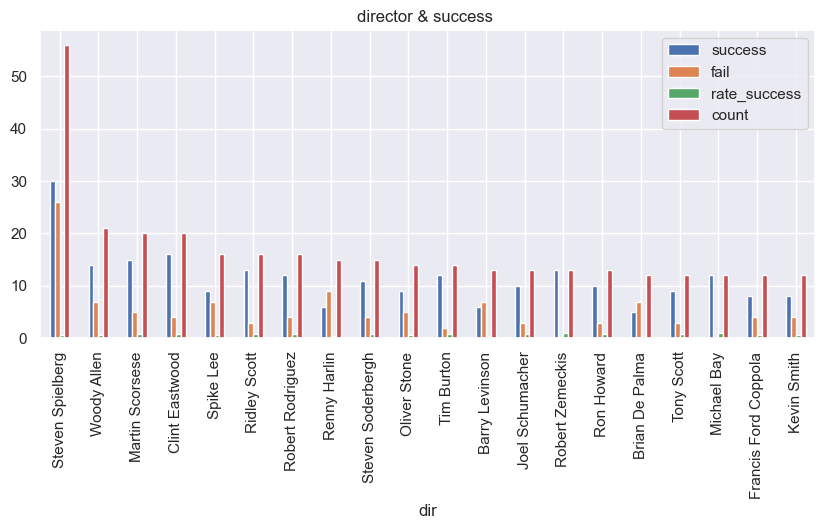

In [74]:
fig , ax = plt.subplots(figsize = (10,4))
df_join.plot(ax = ax,x ='dir', y = ['success', 'fail', 'rate_success', 'count'], kind = 'bar')
ax.set_title("director & success ");

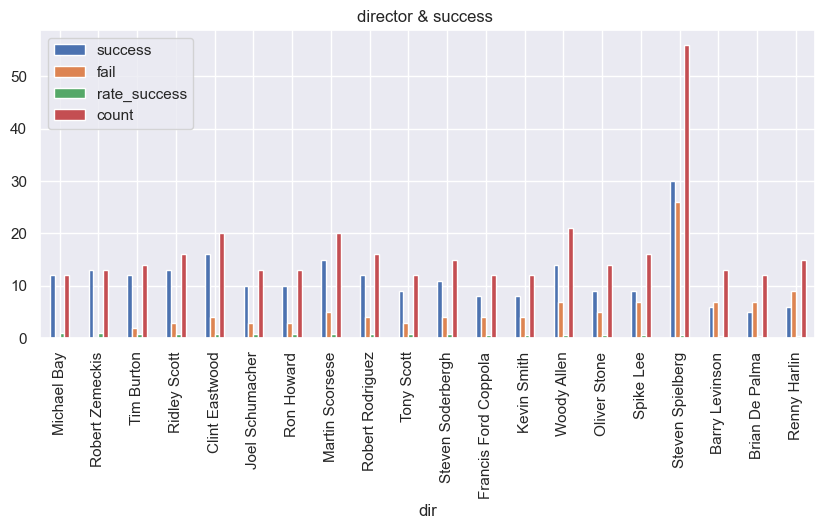

In [75]:
# بر اساس نرخ موفیت مرتب کردم
df_join = df_join.sort_values(by='rate_success', ascending=False).head(20)
fig , ax = plt.subplots(figsize = (10,4))
df_join.plot(ax = ax,x ='dir', y = ['success', 'fail', 'rate_success', 'count'], kind = 'bar')
ax.set_title("director & success ");

### 4) Calculate the average duration of each director's films.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Joseph L. Mankiewicz'),
  Text(1, 0, "Jim O'Hanlon"),
  Text(2, 0, 'Ronald F. Maxwell'),
  Text(3, 0, 'Michael Wadleigh'),
  Text(4, 0, 'Olivier Assayas'),
  Text(5, 0, 'Michael Cimino'),
  Text(6, 0, 'Vivek Agnihotri'),
  Text(7, 0, 'Kevin Sullivan'),
  Text(8, 0, 'George Stevens'),
  Text(9, 0, 'D.W. Griffith')])

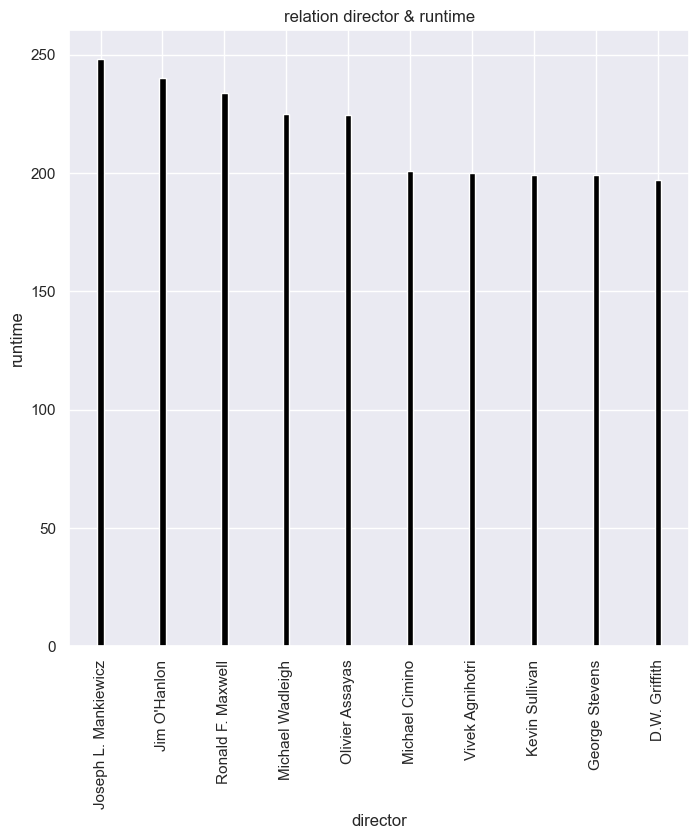

In [76]:
df_mean_duration =pd.DataFrame(df.groupby('director')['runtime'].mean())
df_mean_duration.reset_index(inplace=True)
df_mean_duration = df_mean_duration.sort_values(by=['runtime'], ascending=False)

fig2 , ax2 = plt.subplots(figsize=(8,8))
ax2.bar(df_mean_duration[:10]['director'] , df_mean_duration[:10]['runtime'], color = 'black' , width=0.1)
ax2.set_title('relation director & runtime')
ax2.set_xlabel('director')
ax2.set_ylabel('runtime')
plt.xticks(rotation='vertical')


### 4)  Which director makes the longest films?

In [77]:
min_runtime_index = df['runtime'].idxmin()
max_runtime_index = df['runtime'].idxmax()
print(df.iloc[min_runtime_index]['runtime'])
print(df.iloc[max_runtime_index]['runtime'])
print("the movie with highest runtime" + " : ",df.iloc[max_runtime_index]['title'])
print("the movie with lowest runtime" + "  : ",df.iloc[min_runtime_index]['title'])
print("the director with highest runtime" + ":" ,df.iloc[max_runtime_index]['director'])


df5 = pd.DataFrame(df.loc[max_runtime_index,:])
df6 = pd.DataFrame(df.loc[min_runtime_index,:])

# Comparison  2 film at a glance
df_comparied = pd.concat([df5,df6],axis = 1)
df_comparied

0.0
338.0
the movie with highest runtime :  Carlos
the movie with lowest runtime  :  The Tooth Fairy
the director with highest runtime: Olivier Assayas


2384  \
budget                                                      16.705882   
genres                                   Crime Drama Thriller History   
keywords                       gun car bomb miniseries terrorism opec   
original_language                                                  en   
overview            The story of Venezuelan revolutionary, Ilich R...   
popularity                                                   0.129609   
revenue                                                     13.815511   
runtime                                                         338.0   
status                                                       Released   
tagline                                The man who hijacked the world   
title                                                          Carlos   
vote_average                                                      6.7   
vote_count                                                   3.912023   
cast                Edgar Ram\u00edrez Alexander Scheer Fadi Abi S...   
director                                              Olivier Assayas   
year                                                             2010   
month                                                               5   
profit                                                      -17128721   
success                                                             0   
budget_qualitative                                                low   
country                                             [France, Germany]   
companies           [Egoli Tossell Film AG, Canal+, Arte France, F...   

                                                                 1011  
budget                                                      13.815511  
genres                                                         Horror  
keywords            gore slasher single mother tooth fairy woodchi...  
original_language                                                  de  
overview            A woman and her daughter (Nicole Muñoz) encoun...  
popularity                                                  -0.333009  
revenue                                                     13.815511  
runtime                                                           0.0  
status                                                       Released  
tagline                                                                
title                                                 The Tooth Fairy  
vote_average                                                      4.3  
vote_count                                                   2.564949  
cast                Lochlyn Munro Chandra West Steve Bacic Jianna ...  
director                                                 Chuck Bowman  
year                                                             2006  
month                                                               8  
profit                                                              0  
success                                                             0  
budget_qualitative                                                low  
country                                                            []  
companies                                                          []

#### 5) In which languages are movies more popular and have more audiance?

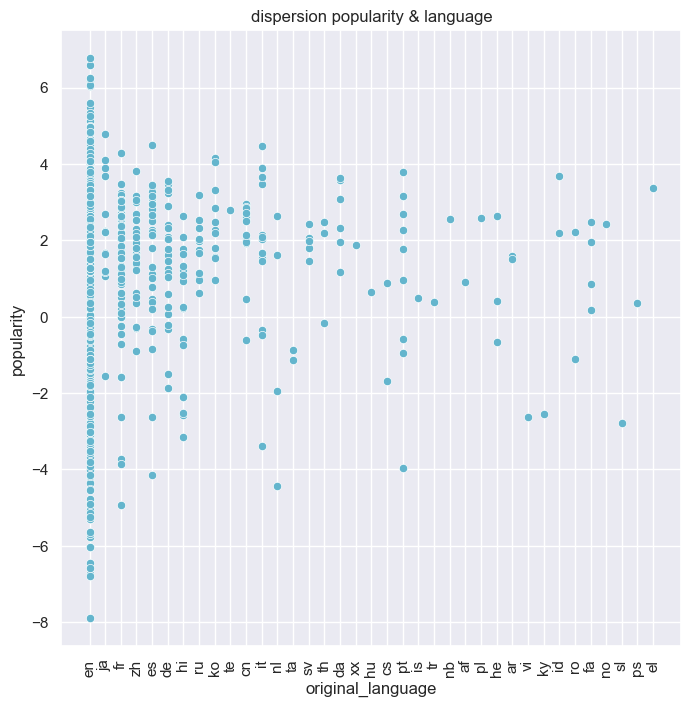

In [78]:
fig , ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x=df['original_language'],y=df['popularity'],color='c')
plt.xticks(rotation='vertical')
ax.set_title('dispersion popularity & language')
fig;

#### 6) What actors are more active?

In [79]:
df2 = pd.read_csv('data.csv')
df2.rename(columns={'original_title':'title'}, inplace=True)
df2 = df2[['title','cast']]
df_cast = pd.merge(df, df2,on=['title'], how='inner' )


In [80]:
empty_dic={}
def count_cast(x):
   try:
        if pd.isna(x)==False:
            x_splited =  str(x).split('|')
            for item in x_splited:
                if item in empty_dic.keys():
                        empty_dic[item]=empty_dic[item]+1
                else:
                    empty_dic[item]=1

   except:
       print(x)

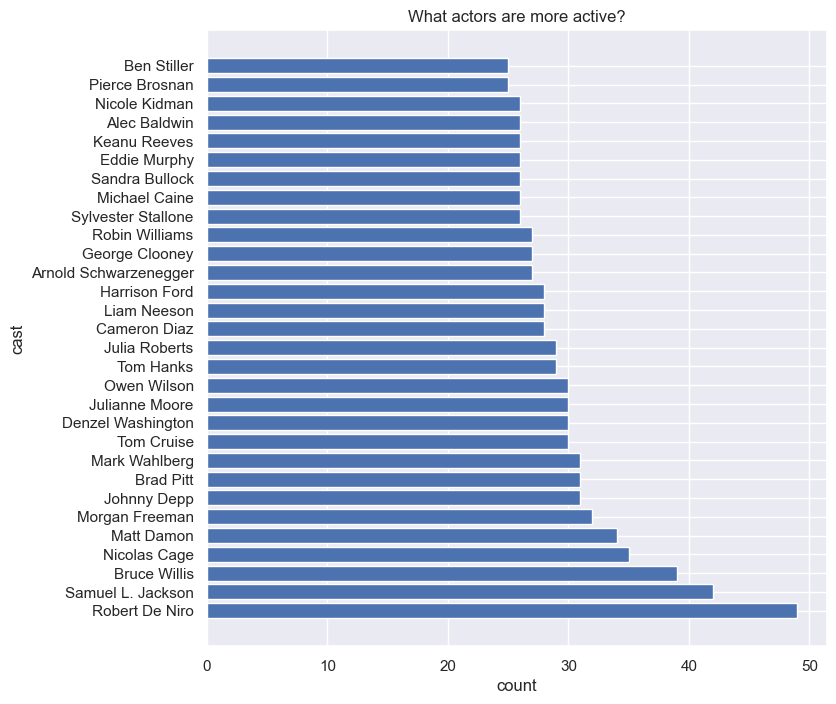

In [81]:
df_cast['cast_y'].apply(count_cast) 
new_dict={'cast_y':empty_dic.keys(), 'count':empty_dic.values()}
df_count_cast = pd.DataFrame(new_dict)
df_count_cast.sort_values(by='count' , ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(8,8))
ax.barh(df_count_cast[:30]['cast_y'], df_count_cast[:30]['count'])
ax.set_xlabel('count')
ax.set_ylabel('cast')
ax.set_title('What actors are more active?');

### 7) In which years have sales been higher? What is the cause?

Text(0, 0.5, 'revenue')

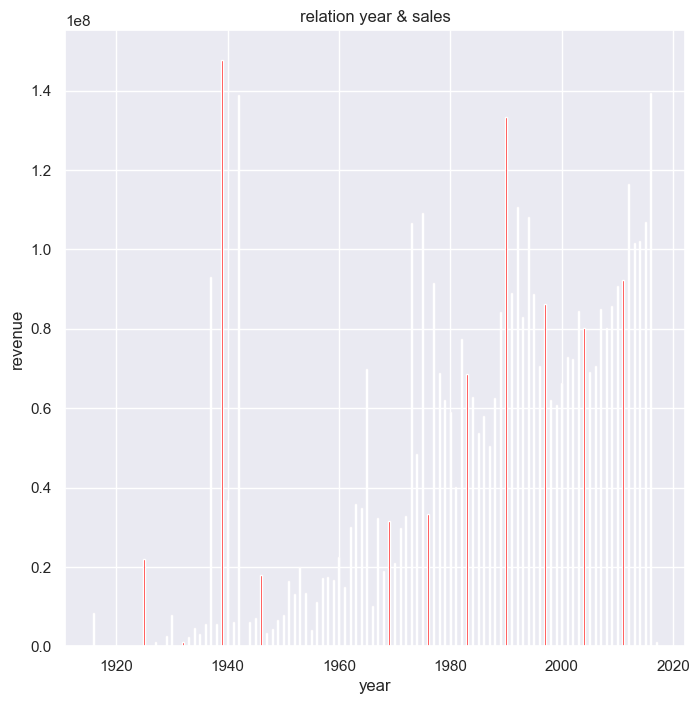

In [82]:
df_year_sales =pd.DataFrame(df_copy.groupby('year')['revenue'].mean())
df_year_sales.reset_index(inplace=True)
df_year_sales = df_year_sales.sort_values(by=['revenue'], ascending=False)

fig2 , ax2 = plt.subplots(figsize=(8,8))
ax2.bar(df_year_sales['year'] , df_year_sales['revenue'], color = 'red' , width=0.2)
ax2.set_title('relation year & sales')
ax2.set_xlabel('year')
ax2.set_ylabel('revenue')

Text(0.5, 0, 'year')

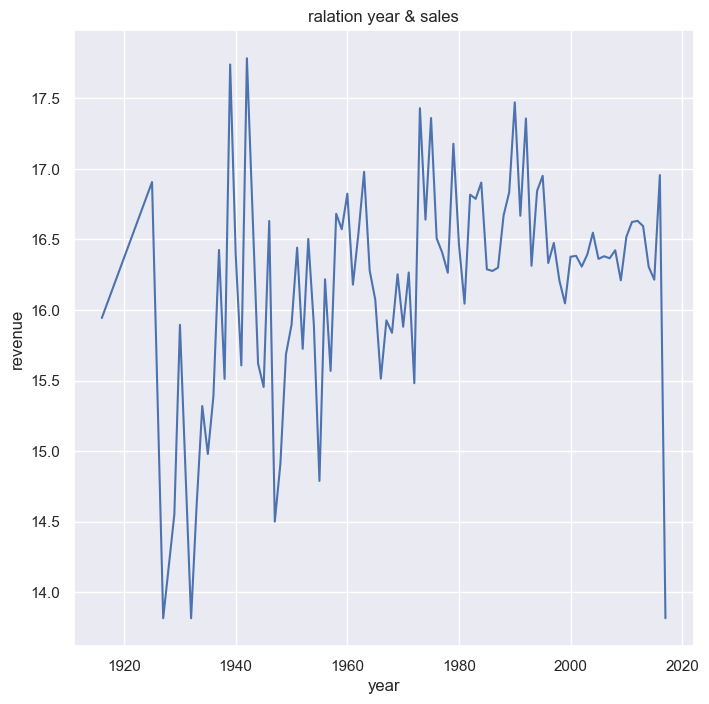

In [83]:
fig2 , ax2 = plt.subplots(figsize=(8,8))
df_year_sales = df.groupby('year')['revenue'].mean()
df_year_sales.plot()

# df_year_budget = df.groupby('year')['budget'].mean()
# df_year_budget.plot()

plt.title('ralation year & sales')
plt.ylabel('revenue')
plt.xlabel('year')

### 8) Which years were the most movies made?

(array([1920, 1925, 1930, 1935, 1940, 1945, 1950, 1955, 1960, 1965, 1970,
        1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015]),
 [Text(1920, 0, '1920'),
  Text(1925, 0, '1925'),
  Text(1930, 0, '1930'),
  Text(1935, 0, '1935'),
  Text(1940, 0, '1940'),
  Text(1945, 0, '1945'),
  Text(1950, 0, '1950'),
  Text(1955, 0, '1955'),
  Text(1960, 0, '1960'),
  Text(1965, 0, '1965'),
  Text(1970, 0, '1970'),
  Text(1975, 0, '1975'),
  Text(1980, 0, '1980'),
  Text(1985, 0, '1985'),
  Text(1990, 0, '1990'),
  Text(1995, 0, '1995'),
  Text(2000, 0, '2000'),
  Text(2005, 0, '2005'),
  Text(2010, 0, '2010'),
  Text(2015, 0, '2015')])

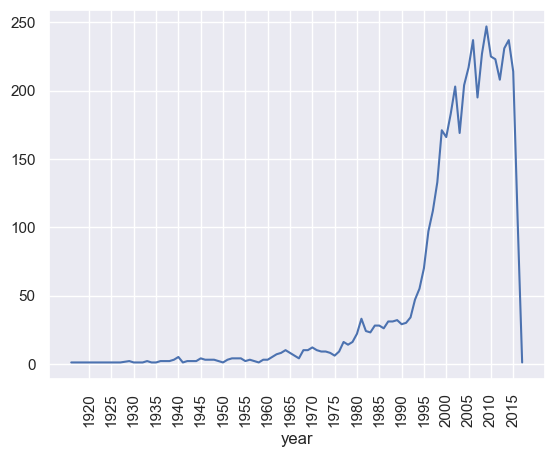

In [84]:
df.groupby('year')['title'].count().plot(xticks = np.arange(1920,2020,5))
ax.set_title("Year vs number movie", fontsize=13)
ax.set_xlabel('year',fontsize = 12)
ax.set_ylabel('number movie',fontsize = 12)
plt.xticks(rotation='vertical')

###  9) Which months have the highest number of movies released?


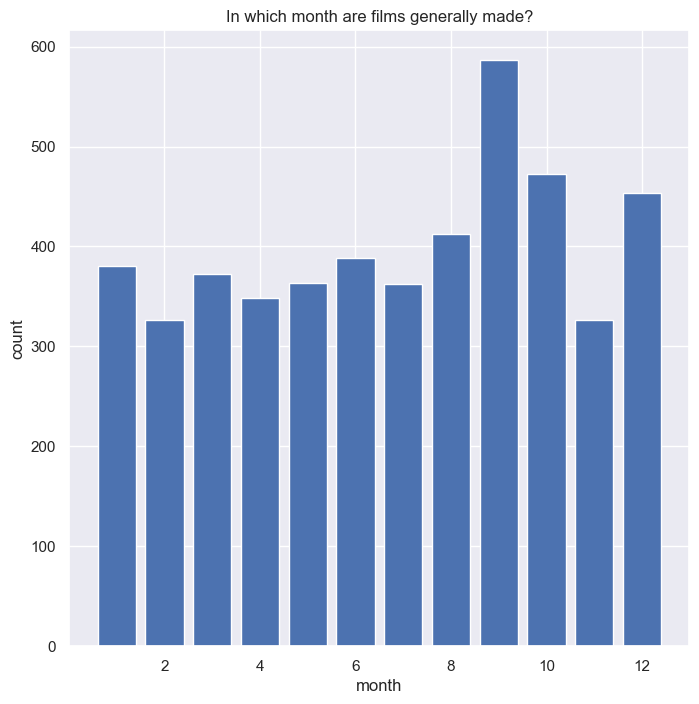

In [85]:
released_film = df.loc[df['status']=='Released']
released_film = released_film.groupby('month')['title'].count()
released_film = released_film.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8,8))
ax.bar( released_film.index,released_film.values)
ax.set_xlabel('month')
ax.set_ylabel('count')
ax.set_title('In which month are films generally made?');

 #### 10) Is there a correlation between cost and popularity?
 ####   Is there a correlation between cost and popularity? Are high-budget movies more popular than others?

 ###### فیلمهای با بودجه بالا لزوما محبوبتر از بقیه نیستن!

0.6150991097272032


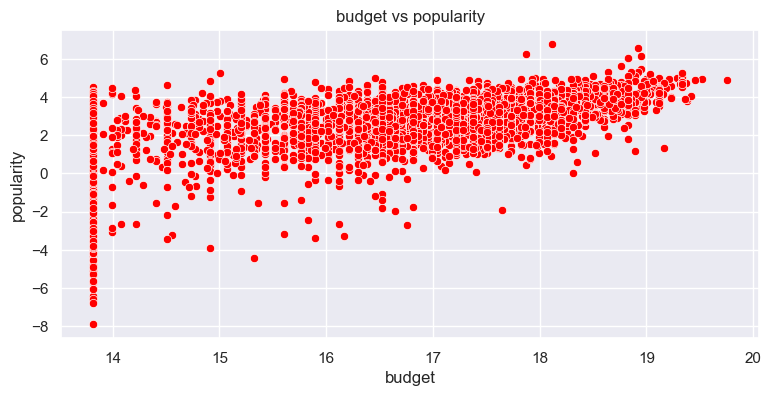

In [86]:
fig ,ax=plt.subplots(1,1,figsize=(9,4))
sns.scatterplot(data=df, x='budget', y='popularity', color = 'red' )
ax.set_title('budget vs popularity')
print(df['popularity'].corr(df['budget']))

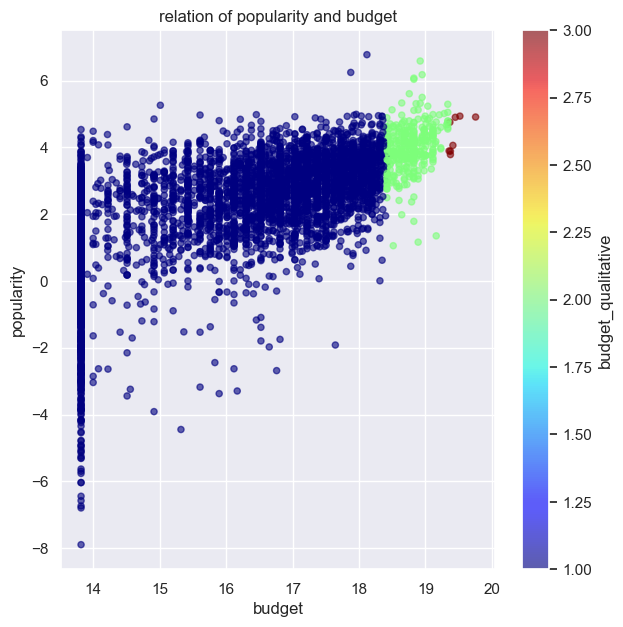

In [87]:
df_C = df.copy()
df_C.replace({'budget_qualitative':{'low' : 1 ,'mid' : 2,'high':3}},inplace=True)

fig, ax = plt.subplots()
fig.set_size_inches(7 , 7)
df_C.plot(x='budget', y='popularity', ax=ax, kind='scatter', alpha=0.6,
                    c='budget_qualitative', cmap=plt.get_cmap("jet"), colorbar=True)
# ax.axis('equal')
ax.set_title('relation of popularity and budget')
fig;

### 11) Which companies have more sales, popularity and the number of films made?

In [88]:
count_dic={}
pop_dic={}
revenue_dic={}
def count(df,x):
    for item in x.companies:
        if item in count_dic.keys():
                count_dic[item]=count_dic[item]+1
                pop_dic[item]=pop_dic[item]+x.popularity
                revenue_dic[item]=revenue_dic[item]+x.revenue
        else:
              count_dic[item]= 1 
              pop_dic[item]= x.popularity
              revenue_dic[item]= x.revenue

df[['companies','popularity','revenue']].apply(lambda x: count(df,x), axis=1)      

0       None
1       None
2       None
3       None
4       None
        ... 
4798    None
4799    None
4800    None
4801    None
4802    None
Length: 4799, dtype: object

In [89]:
new_pop = {k: v/count_dic[k] for k, v in pop_dic.items()}  ## calcute mean of popularity of all films
new_dict={'companies':count_dic.keys(), 'count':count_dic.values(), 'revenue_dic':revenue_dic.values(), 'popularity':new_pop.values()}
df_count_company = pd.DataFrame(new_dict)
df_count_company


companies  count  revenue_dic  popularity
0                    Ingenious Film Partners     29   519.559810    2.946996
1     Twentieth Century Fox Film Corporation    222  3998.790704    2.967726
2                         Dune Entertainment     59  1089.233353    3.356963
3                   Lightstorm Entertainment      5   101.221739    4.223070
4                       Walt Disney Pictures    114  2079.612409    3.204984
...                                      ...    ...          ...         ...
5010                        FM Entertainment      1    13.815511   -0.085432
5011                    Eagle Eye Films Inc.      1    13.815511   -0.085432
5012                   Front Street Pictures      1    13.815511    0.367747
5013                rusty bear entertainment      1    13.815511    0.657459
5014                        lucky crow films      1    13.815511    0.657459

[5015 rows x 4 columns]

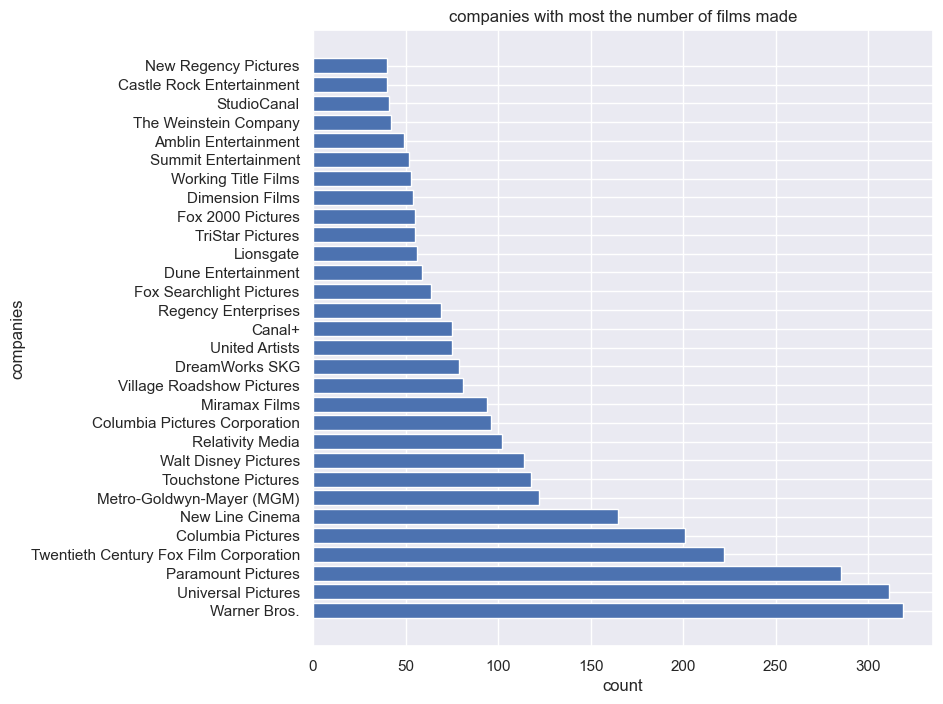

In [90]:
df_count_company.sort_values(by='count' , ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(8,8))
ax.barh(df_count_company[:30]['companies'], df_count_company[:30]['count'])
ax.set_xlabel('count')
ax.set_ylabel('companies')
ax.set_title('companies with most the number of films made');

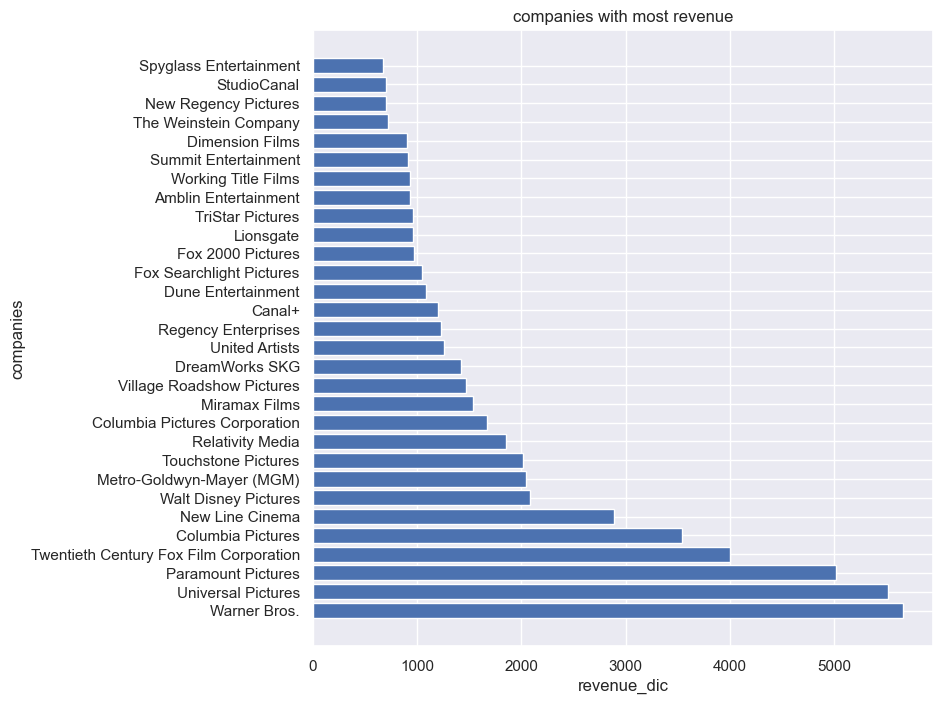

In [91]:
df_count_company.sort_values(by='revenue_dic' , ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(8,8))
ax.barh(df_count_company[:30]['companies'], df_count_company[:30]['revenue_dic'])
ax.set_xlabel('revenue_dic')
ax.set_ylabel('companies')
ax.set_title('companies with most revenue');

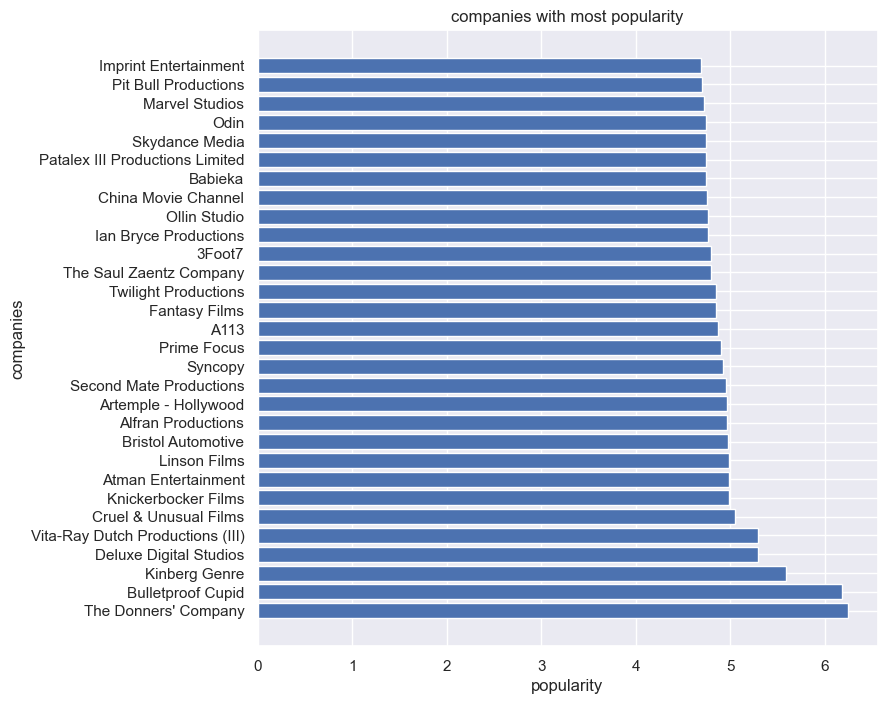

In [92]:
df_count_company.sort_values(by='popularity' , ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(8,8))
ax.barh(df_count_company[:30]['companies'], df_count_company[:30]['popularity'])
ax.set_xlabel('popularity')
ax.set_ylabel('companies')
ax.set_title('companies with most popularity');

### 12) Which contries have more sales, popularity and the number of films made?

In [93]:
count_dic={}
pop_dic={}
revenue_dic={}
def count(df,x):
    for item in x.country:
        if item in count_dic.keys():
                count_dic[item]=count_dic[item]+1
                pop_dic[item]=pop_dic[item]+x.popularity
                revenue_dic[item]=revenue_dic[item]+x.revenue
        else:
              count_dic[item]= 1 
              pop_dic[item]= x.popularity
              revenue_dic[item]= x.revenue

df[['country','popularity','revenue']].apply(lambda x: count(df,x), axis=1)  

0       None
1       None
2       None
3       None
4       None
        ... 
4798    None
4799    None
4800    None
4801    None
4802    None
Length: 4799, dtype: object

In [94]:
new_pop = {k: v/count_dic[k] for k, v in pop_dic.items()}  ## calcute mean of popularity of all films
new_dict={'country':count_dic.keys(), 'count':count_dic.values(), 'revenue_dic':revenue_dic.values(), 'popularity':new_pop.values()}
df_count_company = pd.DataFrame(new_dict)
df_count_company


country  count   revenue_dic  popularity
0   United States of America   3956  66261.774241    2.487507
1             United Kingdom    635  10499.023137    2.559292
2                    Jamaica      2     38.690026    4.436185
3                    Bahamas      4     69.200955    1.897189
4                   Dominica      1     20.786860    4.982561
..                       ...    ...           ...         ...
83               Afghanistan      1     13.815511    0.370000
84                    Angola      1     13.815511    2.209257
85        Dominican Republic      1     13.815511   -2.524417
86                  Cameroon      1     13.815511   -3.680475
87                     Kenya      1     13.815511   -1.115370

[88 rows x 4 columns]

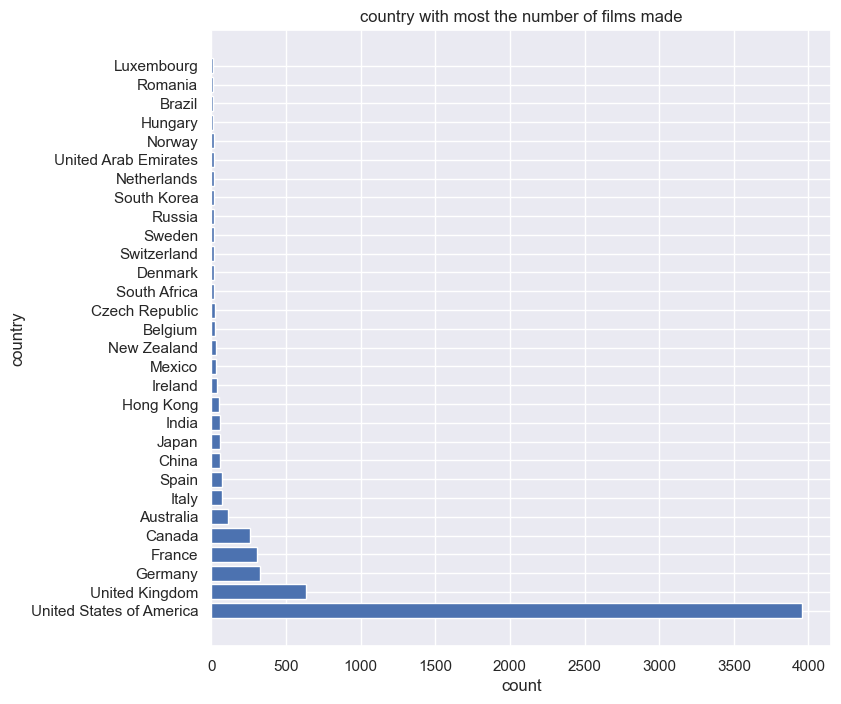

In [95]:
df_count_company.sort_values(by='count' , ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(8,8))
ax.barh(df_count_company[:30]['country'], df_count_company[:30]['count'])
ax.set_xlabel('count')
ax.set_ylabel('country')
ax.set_title('country with most the number of films made');

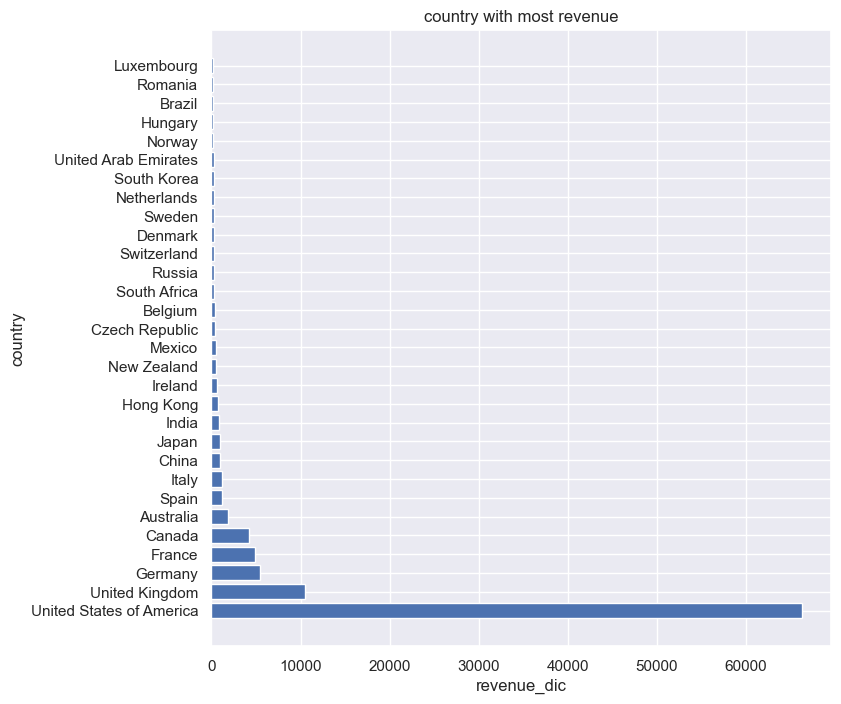

In [96]:
df_count_company.sort_values(by='revenue_dic' , ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(8,8))
ax.barh(df_count_company[:30]['country'], df_count_company[:30]['revenue_dic'])
ax.set_xlabel('revenue_dic')
ax.set_ylabel('country')
ax.set_title('country with most revenue');

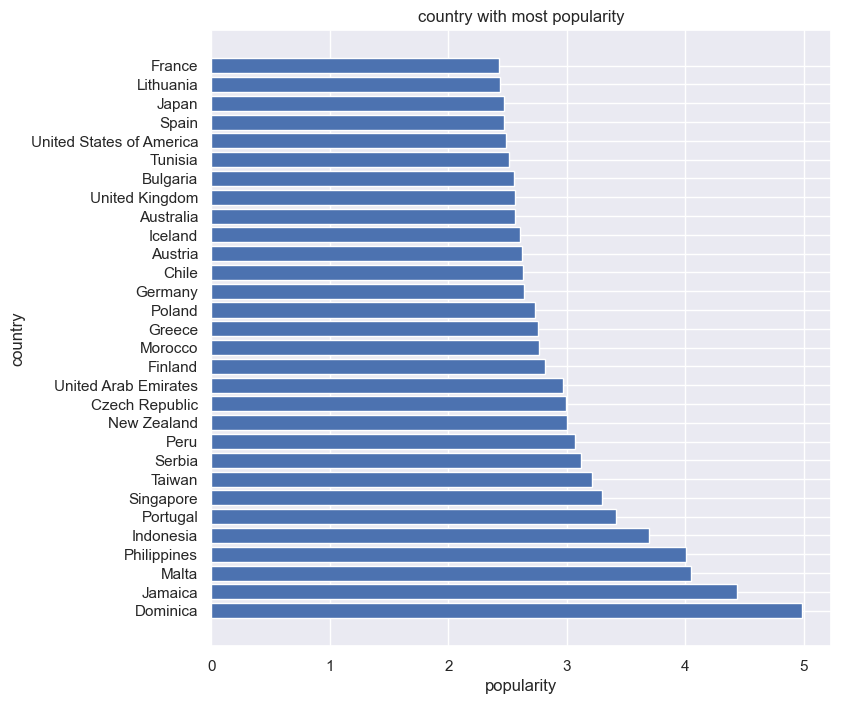

In [97]:
df_count_company.sort_values(by='popularity' , ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(8,8))
ax.barh(df_count_company[:30]['country'], df_count_company[:30]['popularity'])
ax.set_xlabel('popularity')
ax.set_ylabel('country')
ax.set_title('country with most popularity');

### 13) find a way to draw a tag cloud for any of columns you can.

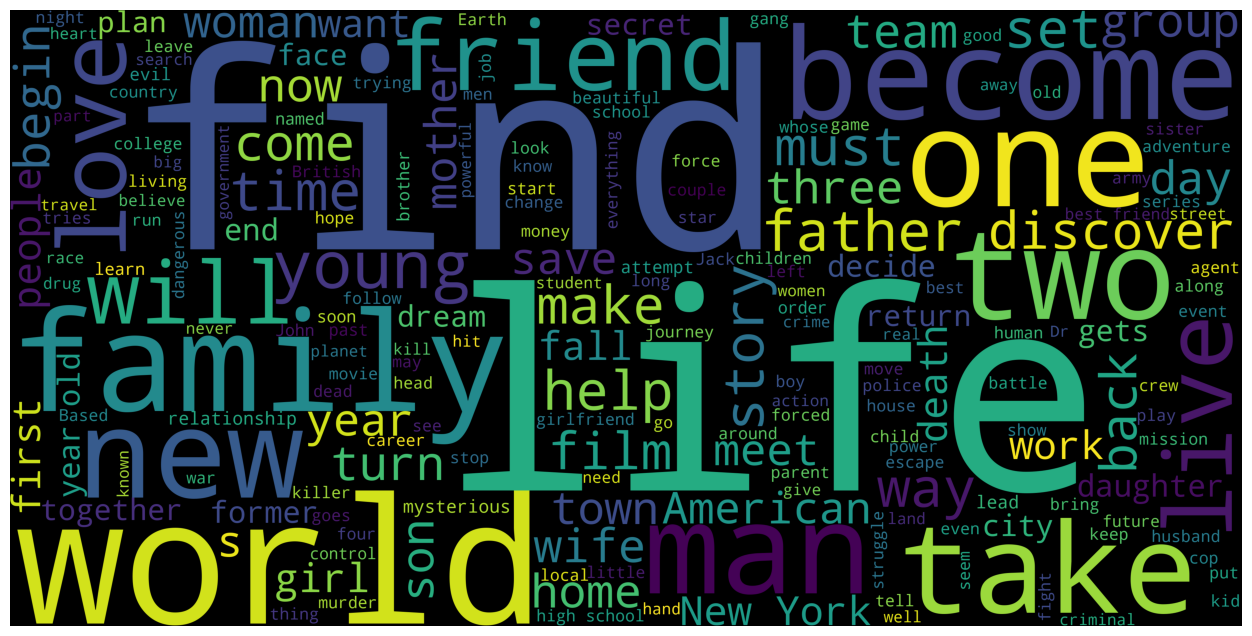

In [98]:
df['overview']=df['overview'].astype('str')
movies_brief =' '.join(df['overview'])

movies_brief_wordcloud=WordCloud(stopwords=STOPWORDS,background_color='black',height=2000,width=4000).generate(movies_brief)
plt.figure(figsize=(16,8))
plt.imshow(movies_brief_wordcloud)
plt.axis('off')
plt.show()

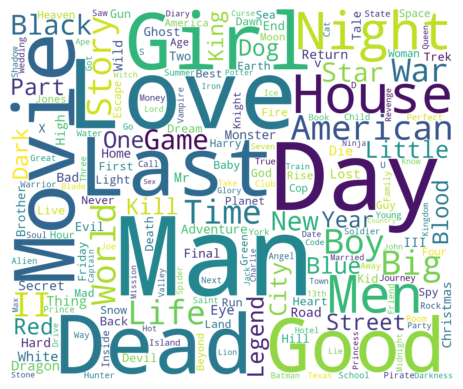

In [99]:
text2 = " ".join(title for title in df.title)
word_cloud2 = WordCloud(max_font_size=300,width=1200, height=1000,collocations = False, background_color = 'white').generate(text2)
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

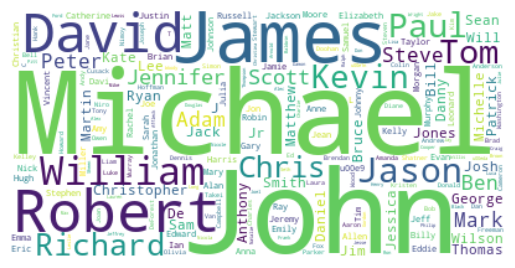

In [100]:
text3 = " ".join(name for name in df.cast)
word_cloud3 = WordCloud(collocations = False, background_color = 'white').generate(text3)
plt.imshow(word_cloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

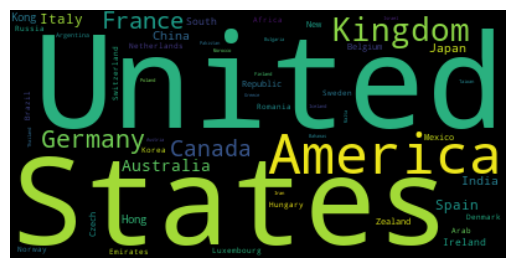

In [101]:
list_of_country = df['country'].apply('sum')
text4 = " ".join(list_of_country)
word_cloud4 = WordCloud(collocations = False, background_color = 'black').generate(text4)
plt.imshow(word_cloud4, interpolation='bilinear')
plt.axis("off")
plt.show()